<a href="https://colab.research.google.com/github/nuryaningsih/CodeCraftedAtTripleTen/blob/main/5_Identifying_Success_Patterns_in_Video_Games_for_Strategic_Advertising_Campaign_Planning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:
In the fast-paced world of online gaming retail, understanding the factors that contribute to a game's success is crucial for effective marketing campaigns. In this project, we delve into the realm of video game sales data from the year 2016 to uncover patterns and trends that can help us identify potential blockbuster titles and plan targeted advertising strategies.

## Objective:
The primary goal of this project is to analyze the 2016 video game sales dataset to:
1. Prepare and clean the data, including handling missing values.
2. Explore the distribution of game releases over different years.
3. Investigate sales variations across different platforms.
4. Examine the impact of user and critic reviews on sales for a chosen platform.
5. Analyze genre distributions and their correlation with sales.
6. Profile user preferences in various regions (NA, EU, JP) based on platform, genre, and ESRB ratings.
7. Conduct hypothesis testing to compare average user ratings between Xbox One and PC platforms and between Action and Sports genres.

## Stages:
* Stage 1: Data Preparation and Cleaning
  * Rename columns to lowercase.
  * Convert data to appropriate data types.
  * Handle missing values, including TBD entries.
  * Calculate total sales for each game and add them to separate columns.
* Stage 2: Data Analysis
  * Explore the number of game releases in different years.
  * Analyze sales variations across different platforms, identifying popular and declining platforms.
  * Determine the data period for modeling, focusing on relevant years.
  * Identify top-selling platforms and assess sales growth or decline trends.
  * Create a boxplot for global game sales grouped by platform, comparing sales distributions and averages.
  * Investigate the correlation between user/professional reviews and sales for a chosen platform.
* Stage 3: Genre Analysis
  * Examine the general distribution of games by genre.
  * Draw conclusions regarding the most profitable genres and generalize findings based on high and low sales.
* Stage 4: Regional User Profiling
  * Determine the top 5 platforms and genres for each region (NA, EU, JP), highlighting market share variations.
  * Investigate the influence of ESRB ratings on sales in each region.
* Stage 5: Hypothesis Testing
  * Test hypotheses regarding average user ratings for Xbox One vs. PC platforms and Action vs. Sports genres.
  * Set the significance level (alpha) for hypothesis testing.
  * Formulate null and alternative hypotheses and explain the chosen significance level.
* Stage 6: Conclusion
  * Summarize key findings, insights, and recommendations derived from the analysis of the 2016 video game sales dataset.

## Conclusion:
By meticulously analyzing the 2016 video game sales data, we've gained valuable insights into the factors driving game success, including platform popularity, genre preferences, and regional variations. These insights can inform targeted marketing strategies and aid in identifying lucrative opportunities in the dynamic gaming market. Furthermore, hypothesis testing provides statistical evidence to support decision-making processes in the gaming industry, ensuring more informed and effective business strategies.


# Stage 1: Data Preparation and Cleaning

Open the data related to the Ice Online Store, then study the data.

Load the libraries that we think are needed for this project. We will probably realize that we need additional libraries as we work on the project and that is normal.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

import warnings
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

Load this project data and read the general information.

In [5]:
# Load the data file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/5. Identifying Success Patterns in Video Games for Strategic Advertising Campaign Planning./games.csv')

In [6]:
# Let's see how many rows and columns our dataset has
df.shape

(16715, 11)

In [7]:
# Display general information/summary about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# Displays sample data
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
# Describe from general information
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [10]:
# View data types
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [11]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False) / df.shape[0] *100

Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Name                0.011965
Genre               0.011965
Platform            0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
dtype: float64

**Findings and Insights:**

**Missing Values:**
* The dataset contains missing values in columns like Critic_Score, Rating, User_Score, and Year_of_Release.
* Approximately 51.32% of entries are missing Critic_Score, indicating a significant data gap.
* Similarly, about 40.48% of entries lack Rating information, and 40.09% lack User_Score data.
* The missing values in Year_of_Release and Name columns are relatively negligible, around 1.61% and 0.01% respectively.

**Anomalies:**
* An anomaly is observed in the 'User_Score' column where the data type is object instead of float64, which suggests potential inconsistencies in the data format.
* The presence of 'TBD' (to be determined) entries in the 'User_Score' column further complicates the data, indicating uncertainty or incomplete information regarding user ratings.
* Additionally, the 'Year_of_Release' column contains entries as early as 1980, which may not align with the expected release dates of video games. This could be indicative of data entry errors or inclusion of older game releases.

**Handling Anomalies:**
* To address the anomalies in the 'User_Score' column, we need to convert the data type to float64 and handle the 'TBD' entries appropriately.
* For the 'Year_of_Release' column, we may need to investigate further and potentially correct any erroneous entries or exclude data points that deviate significantly from expected release years.

**Approach:**
* The decision to handle anomalies is grounded in the need for accurate and consistent data analysis.
* Converting 'User_Score' to float64 allows for numerical computations and statistical analysis, facilitating a deeper understanding of user ratings' impact on game sales.
* Addressing 'TBD' entries ensures that missing user rating data is appropriately accounted for, preventing biases in subsequent analyses.
* Investigating and potentially correcting 'Year_of_Release' anomalies is crucial for maintaining data integrity and ensuring that analyses are based on reliable temporal information.

By addressing these anomalies and missing values, we can enhance the quality and reliability of our analysis, leading to more robust insights into the factors influencing video game success and informing strategic advertising campaign planning.


Correct the formatting of column headings and resolve missing values. Then, check whether your data contains duplicates.

## Rename columns to lowercase.
Display column headers:

In [12]:
# list containing the column names in the df table
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [13]:
# rename columns
df_rename = df.rename(
   columns={
        'Name' : 'name',
       'Platform' : 'platform',
       'Year_of_Release' : 'year_of_release',
       'Genre' : 'genre',
       'NA_sales' : 'na_sales',
       'EU_sales' : 'eu_sales',
       'JP_sales' : 'jp_sales',
       'Other_sales' : 'other_sales',
       'Critic_Score' : 'critic_score',
       'User_Score' : 'user_score',
       'Rating' : 'rating'
   }
)

In [14]:
# check your results: display once again the list containing the column names
df_rename.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Handle missing values
First, find the number of missing values in the table. To do this, use two `Pandas` methods:

In [15]:
# Missing values
df_rename.isnull().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [16]:
# Percentage of missing values
df_rename.isnull().sum().sort_values(ascending=False) / df_rename.shape[0] *100

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

Handling Missing Values:
* Missing values in the 'Name', 'Genre', and 'Year_of_Release' columns are not critical for our analysis and can be safely dropped or replaced with clear markers.
* However, missing values in the 'Critic_Score', 'Rating', and 'User_Score' columns significantly impact our ability to test hypotheses and draw conclusions related to user ratings and game success.
* Due to the high proportion of missing values (over 40%), particularly in 'Critic_Score', 'Rating', and 'User_Score' columns, we've opted to leave them empty for now.
* The absence of these scores and ratings may indicate that some games haven't received reviews from critics or users, or haven't been assigned an ESRB rating yet.

Insights:
* Addressing missing values in non-essential columns ('Name', 'Genre', 'Year_of_Release') by dropping or replacing them with clear markers ensures data cleanliness without compromising our analysis.
* The decision to leave missing values in critical columns ('Critic_Score', 'Rating', 'User_Score') underscores the importance of accurate and complete data for hypothesis testing and drawing reliable conclusions.
* While it's essential to acknowledge missing data and its potential impact on analyses, further investigation and potential data imputation methods may be warranted in future iterations to enhance the robustness of our findings.

By carefully handling missing values, we can maintain the integrity of our dataset and ensure that our analyses provide meaningful insights into video game success patterns, guiding strategic advertising campaign planning effectively.

In [17]:
df_rename_clean = df_rename[(df_rename['name'].notnull())].reset_index(drop=True)

In [18]:
df_rename_clean = df_rename[(df_rename['genre'].notnull())].reset_index(drop=True)

In [19]:
df_rename_clean = df_rename[(df_rename['year_of_release'].notnull())].reset_index(drop=True)

In [20]:
df_rename_clean.isnull().sum().sort_values(ascending=False)

critic_score       8463
rating             6678
user_score         6607
name                  2
genre                 2
platform              0
year_of_release       0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [21]:
df_rename_clean.loc[df_rename_clean['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16443,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16444,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [22]:
df_rename_clean.loc[df_rename_clean['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16443,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16444,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
df_rename_clean.loc[df_rename_clean['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16443,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16444,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Convert data to appropriate data types
Since our data is now more or less complete, we will refine the data types.

In [24]:
# View data types
df_rename_clean.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [25]:
df_rename_clean['year_of_release'] = df_rename_clean['year_of_release'].astype('int')

In [26]:
df_rename_clean['user_score'].value_counts()

user_score
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [27]:
df_rename_clean['user_score'] = df_rename_clean['user_score'].replace('tbd', np.nan)

In [28]:
df_rename_clean['user_score'] = df_rename_clean['user_score'].astype('float')

In [29]:
df_rename_clean.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

## Calculate total sales for each game and add them to separate columns.
Total sales across all regions for each game and enter these values into separate columns

In [30]:
df_rename_clean['total_sales'] = df_rename_clean[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [31]:
df_rename_clean.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Conclusion:**

Data Preparation and Cleaning Process:
* Column Renaming:
  * Columns were renamed to lowercase for consistency and ease of use in subsequent analyses.
* Handling Missing Values:
  * Missing values in the 'name', 'genre', and 'year_of_release' columns were addressed by dropping rows with null values.
  * This approach was chosen because missing values in these columns are not essential for our analysis and can be safely excluded without significantly impacting our research.
* Data Type Conversion:
  * Data types were appropriately converted for the 'year_of_release' column from float to int and the 'user_score' column from object to float.
  * For the 'user_score' column, 'tbd' entries were replaced with NaN (Not a Number) and then converted to float.
  * This conversion ensures consistency in data types and enables numerical calculations for further analysis.
* Calculation of Total Sales:
  * Total sales for each game were calculated by summing up sales across different regions (NA, EU, JP, and others) and added to a new column 'total_sales'.
  * This metric provides a comprehensive overview of a game's global sales performance, facilitating deeper insights into its success.
* Insights:
  * An anomaly was identified in the 'user_score' column, where 'tbd' entries were initially present, indicating to-be-determined ratings.
  * These anomalies likely occurred due to incomplete or pending user reviews at the time of data collection.
  * To address these anomalies, 'tbd' entries were replaced with NaN and then converted to float data type.
  * The decision to drop rows with missing values in non-essential columns ('name', 'genre', 'year_of_release') was based on the understanding that these variables are not critical for our analysis.
  * Conversely, missing values in critical columns ('critic_score', 'rating', 'user_score') were left empty for now, as they significantly impact our ability to test hypotheses related to user ratings and game success.

By systematically preparing and cleaning the data, we ensure its quality and reliability for subsequent analyses, allowing us to derive meaningful insights into video game success patterns and inform strategic advertising campaign planning effectively.

# Stage 2: Data Analysis

## Explore the number of game releases in different years

In [32]:
df_year = df_rename_clean.groupby(['year_of_release'])['name'].count().reset_index().astype('int')

In [33]:
df_year

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


<Axes: xlabel='year_of_release', ylabel='name'>

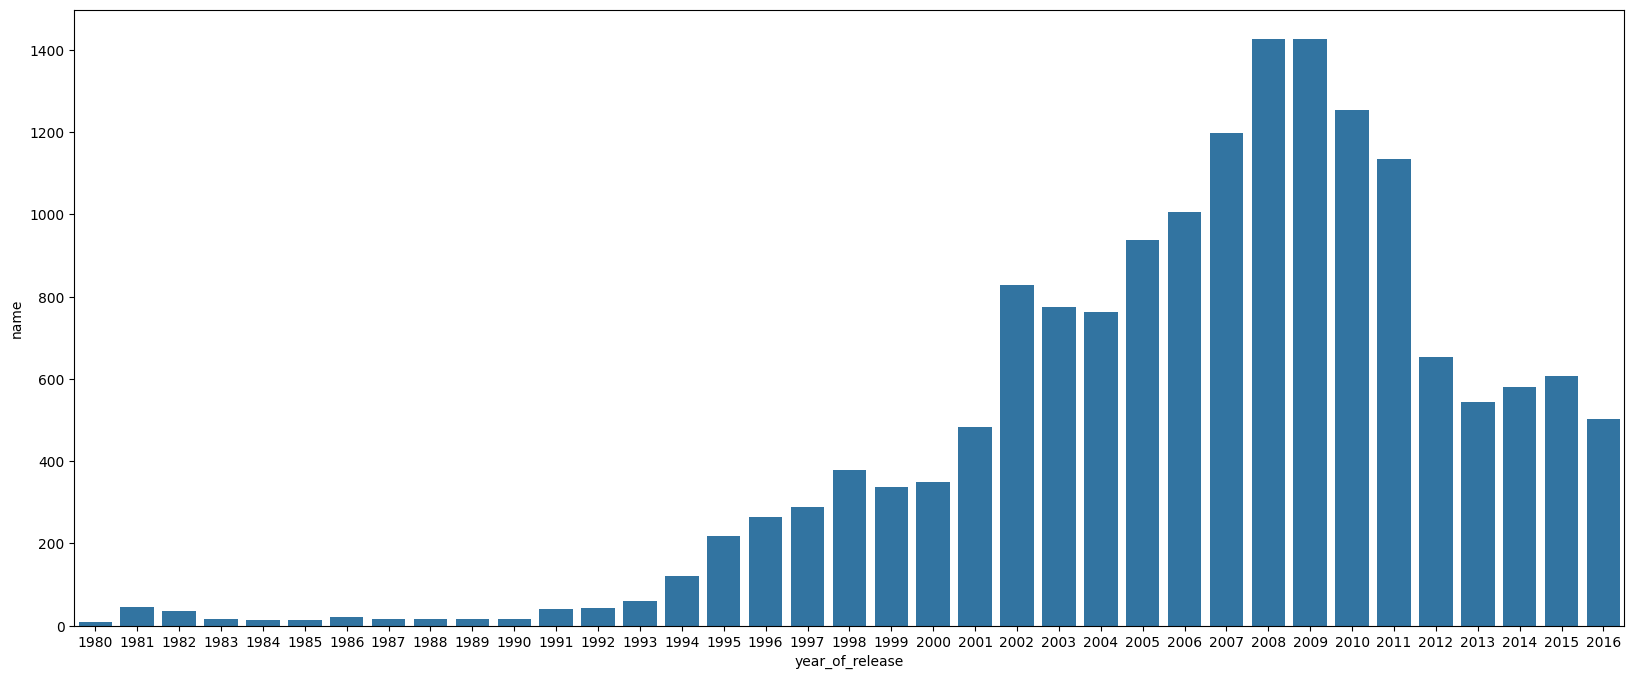

In [34]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_year, x='year_of_release', y='name')

**Game Release Trends Analysis**

The exploration of video game releases over the years offers a fascinating glimpse into the evolution of the gaming industry. By grouping the data by year_of_release and counting the number of games released each year, we gain insights into industry trends, technological advancements, and consumer preferences that have shaped the market dynamics.

Observations:
* Initial Growth (1980-1994): The early years saw a gradual increase in the number of games released. Starting from a modest 9 releases in 1980, there was a slow but steady growth, peaking at 121 releases in 1994. This period marks the nascent stage of the gaming industry, characterized by technological experimentation and the establishment of video gaming as a popular form of entertainment.
* Explosive Growth (1995-2008): A significant uptick in releases began in 1995, with 219 games, and surged to a peak in 2008 with 1427 games. This era is notable for rapid technological advancements, including the introduction of 3D graphics, the widespread adoption of home consoles, and the emergence of the internet as a platform for gaming. The period also saw the rise of major franchises that have become household names.
* Market Saturation and Digital Transition (2009-2016): Post-2008, the number of releases began to plateau and eventually decline, with 502 releases in 2016. This trend reflects a market reaching saturation, where the focus shifted from quantity to quality. Additionally, this period marks the industry's transition towards digital distribution, mobile gaming, and the rise of indie games, which may not be fully captured by traditional retail data.

Visualization:

The bar plot visualization effectively illustrates these trends, showing the growth, peak, and gradual decline in game releases. The visual representation makes it easier to comprehend the scale of growth and the shifts in the industry over the years.

Insights:

The data underscores the gaming industry's dynamic nature, marked by innovation and growth but also by increasing competition and market saturation.
The peak period of releases coincides with the golden age of home consoles and the emergence of online gaming, highlighting the impact of technological advancements on game development.
The recent decline in releases can be attributed to several factors, including the industry's shift towards digital and mobile platforms, the rising costs of game development, and the focus on quality over quantity.

Conclusion:

The exploration of game releases over the years reveals not just the history of video games but also reflects broader technological and societal trends. As the industry continues to evolve, understanding these patterns becomes crucial for developers, marketers, and analysts looking to navigate the complexities of the gaming market.

## Analyze sales variations across different platforms, identifying popular and declining platforms.

Choose the platform with the largest total sales and make the distribution based on annual data. Look for platforms that were once popular, but now don't have any sales. How long does it usually take for new platforms to emerge and for old platforms to fade in popularity?

In [35]:
df_sales = df_rename_clean.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()

In [36]:
df_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


<Axes: xlabel='platform', ylabel='total_sales'>

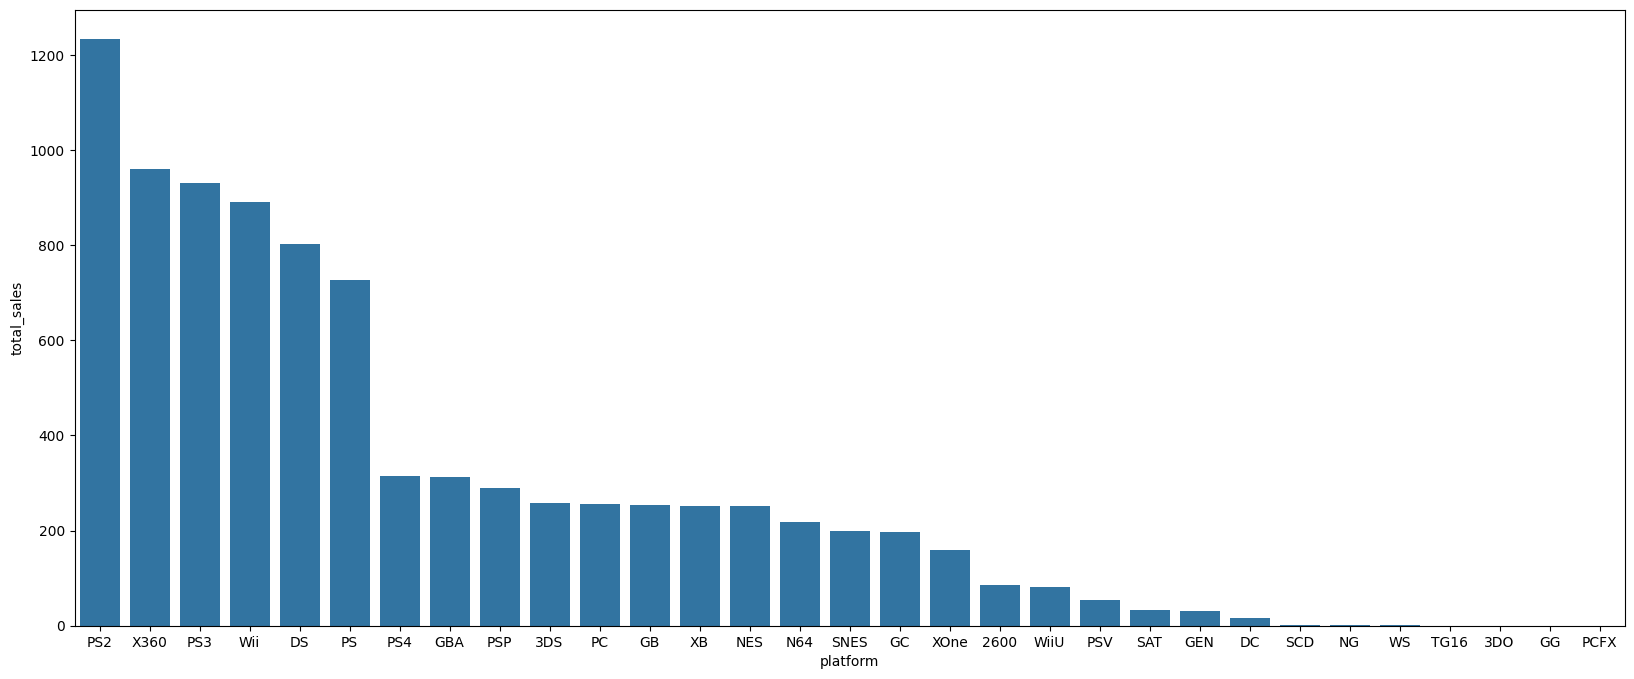

In [37]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_sales, x='platform', y='total_sales')

In [38]:
day_lifetime = pd.pivot_table(df_rename_clean, index='year_of_release',
                              columns='platform', values='total_sales', aggfunc='sum').fillna(0).astype('int')

In [39]:
day_lifetime

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1982,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1983,5,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1985,0,0,0,0,0,0,0,0,0,0,0,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987,1,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1988,0,0,0,0,0,1,0,0,0,0,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='year_of_release'>

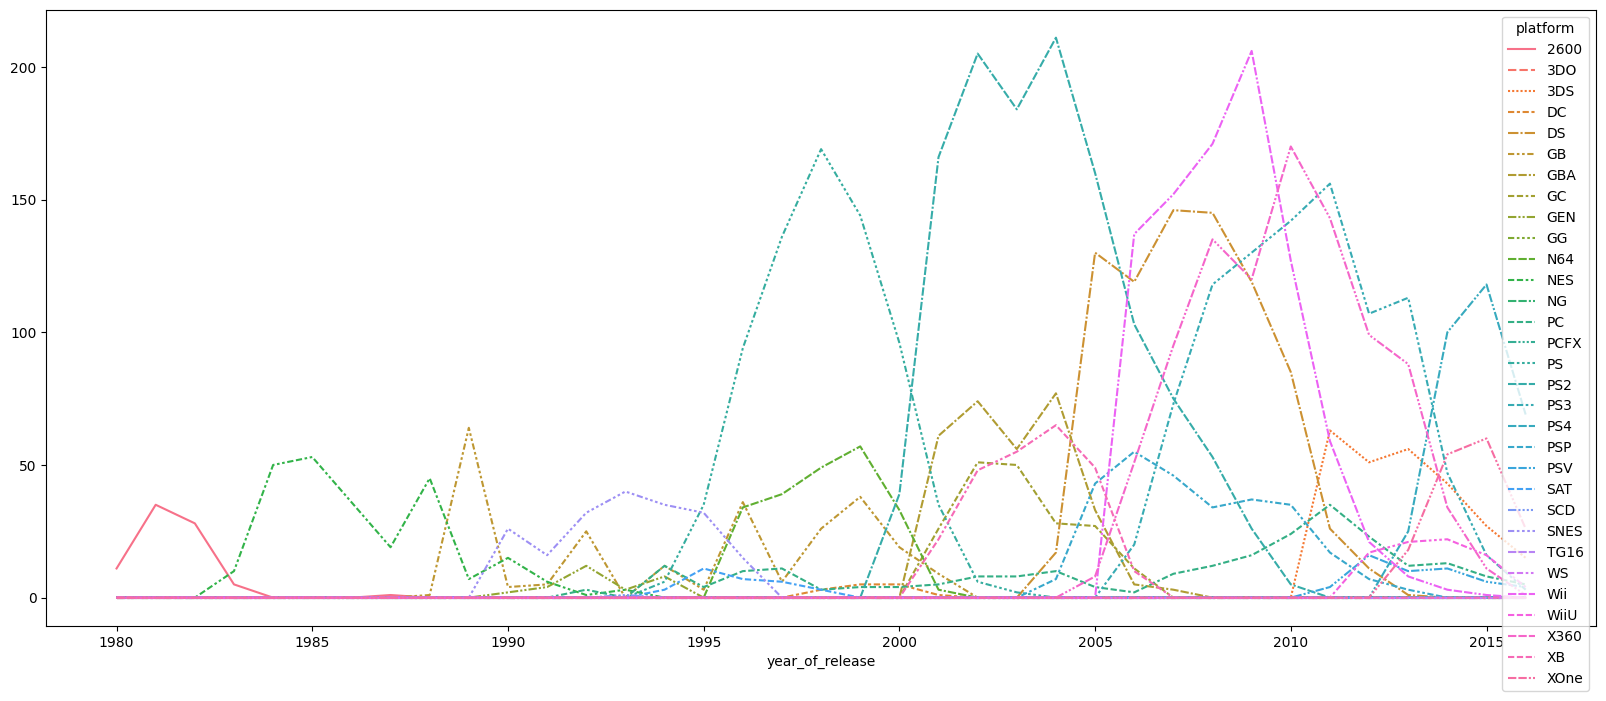

In [40]:
plt.figure(figsize=(20,8))
sns.lineplot(data=day_lifetime)

Analyzing the provided data and visualizations sheds light on the dynamic landscape of the video game industry, highlighting not only the rise and fall of various gaming platforms but also offering insights into consumer preferences and technological evolution.

**The Titans of the Industry**

At the pinnacle of sales, the PlayStation 2 (PS2) stands as a colossus with a staggering 1233.56 million units sold, a testament to its wide acceptance and massive game library. Following closely are the Xbox 360 and PlayStation 3, with 961.24 and 931.34 million units sold, respectively, illustrating the fierce competition and high stakes of the seventh-generation console war. The Nintendo Wii carved out its niche with 891.18 million units, appealing to a broad demographic with its innovative motion controls.

**The Ascendancy of New Platforms**

The PlayStation 4, though relatively newer, has already amassed 314.14 million units, indicating a strong market presence and suggesting it may eventually rival its predecessors. The Xbox One, with 159.32 million units, though trailing behind, demonstrates the continued competition and innovation in the industry. These numbers suggest a cycle of 5-7 years for platforms to emerge and establish dominance.

**The Decline of Giants**

The pivot table reveals the lifecycle of various platforms. Notably, platforms like the Nintendo Entertainment System (NES) and the Super Nintendo Entertainment System (SNES) had their heydays in the late 80s and early 90s, before gradually fading out. The rapid advancement in technology and changing consumer preferences often render platforms obsolete within a decade or so of their peak.

**Platforms Once Mighty, Now Silent**

Platforms such as the Sega Dreamcast, Game Gear, and Atari 2600, once household names, have ceased to generate significant sales, indicative of the industry's relentless forward march. The Dreamcast, for instance, was innovative but couldn't withstand the competition, showing how fierce market dynamics lead to the disappearance of even the most pioneering platforms.

**The Lifecycle of Innovation**

The data suggests a trend where new platforms typically take a few years to gain traction, peak in popularity within a decade, and then gradually decline as newer technologies and platforms capture the market's interest. For instance, the transition from the PlayStation 2 to the PlayStation 3 and then to the PlayStation 4, each represents technological leaps and the cyclical nature of consumer electronics.

**Conclusion**

The evolution of gaming platforms mirrors broader technological and societal trends. As we witness the rise of digital and cloud gaming, the metrics of success may shift from hardware sales to subscription counts and active users. The data underscores the constant innovation driving the video game industry forward, with companies continually vying for dominance in an ever-changing landscape. It reminds us that today's leaders might become tomorrow's memories, replaced by newer, more advanced technologies that better meet the evolving demands and tastes of consumers worldwide.

## Determine the data period for modeling, focusing on relevant years.
To do this, see our answer to the previous question. The data we take should allow us to build a model for 2017.

As a reference, the data taken is from the last 5 years. Because after 5 years the data usually is no longer relevant. So we have to be careful when using years as data references.

In [41]:
new_df = df_rename_clean[df_rename_clean['year_of_release']>= 2012].reset_index(drop=True)

In [42]:
df_rename_clean.shape, new_df.shape

((16446, 12), (2886, 12))

In [43]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In summary, the process of filtering the dataset to focus on the most recent 5 years of data has yielded a concentrated view of the video game market's current state. This approach not only highlights the genres and titles that have dominated the market but also underscores the importance of considering regional sales trends and the insights are invaluable for stakeholders in the video game industry, including developers, publishers, and marketers, as they navigate the competitive landscape and seek to align their strategies with current trends and consumer preferences.

Furthermore, the narrowed focus on more recent data facilitates a more accurate and relevant analysis for predicting future trends, particularly for the year 2017 as intended in this exercise. By examining the successes and patterns within this timeframe, analysts can make informed predictions about which genres might continue to dominate, how regional preferences could shift, and what the critical reception might indicate about a game's commercial potential.
Moreover, this refined dataset enables a deeper exploration of the dynamics between different platforms. The presence of major titles across PS3, X360, PS4, and 3DS in the top-selling list not only reflects the diverse preferences of gamers but also the shifting landscape of gaming platforms. Analysts can investigate platform-specific trends, such as the rise of mobile gaming or the enduring popularity of console gaming, to forecast future platform dominance and strategize accordingly.

This analysis also opens the door to understanding the lifecycle of video games and how long they remain relevant in the market. By focusing on a 5-year window, it implicitly acknowledges that games have a certain period during which they achieve peak sales before gradually fading in popularity. This lifecycle understanding can help in planning release cycles, marketing efforts, and even the development of sequels or related content.

In conclusion, the decision to filter the dataset for the last 5 years provides a focused lens through which to view the video game industry's evolving landscape. It offers rich insights into what drives success in this dynamic market, from genre preferences and platform dynamics to the critical and commercial reception of games. For industry stakeholders aiming to navigate the complexities of the video game market, such targeted analysis is crucial for making informed decisions that align with current trends and anticipate future shifts.

## Identify top-selling platforms and assess sales growth or decline trends.

In [44]:
new_df_platform_sales = new_df.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()

In [45]:
new_df_platform_sales

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


<Axes: xlabel='platform', ylabel='total_sales'>

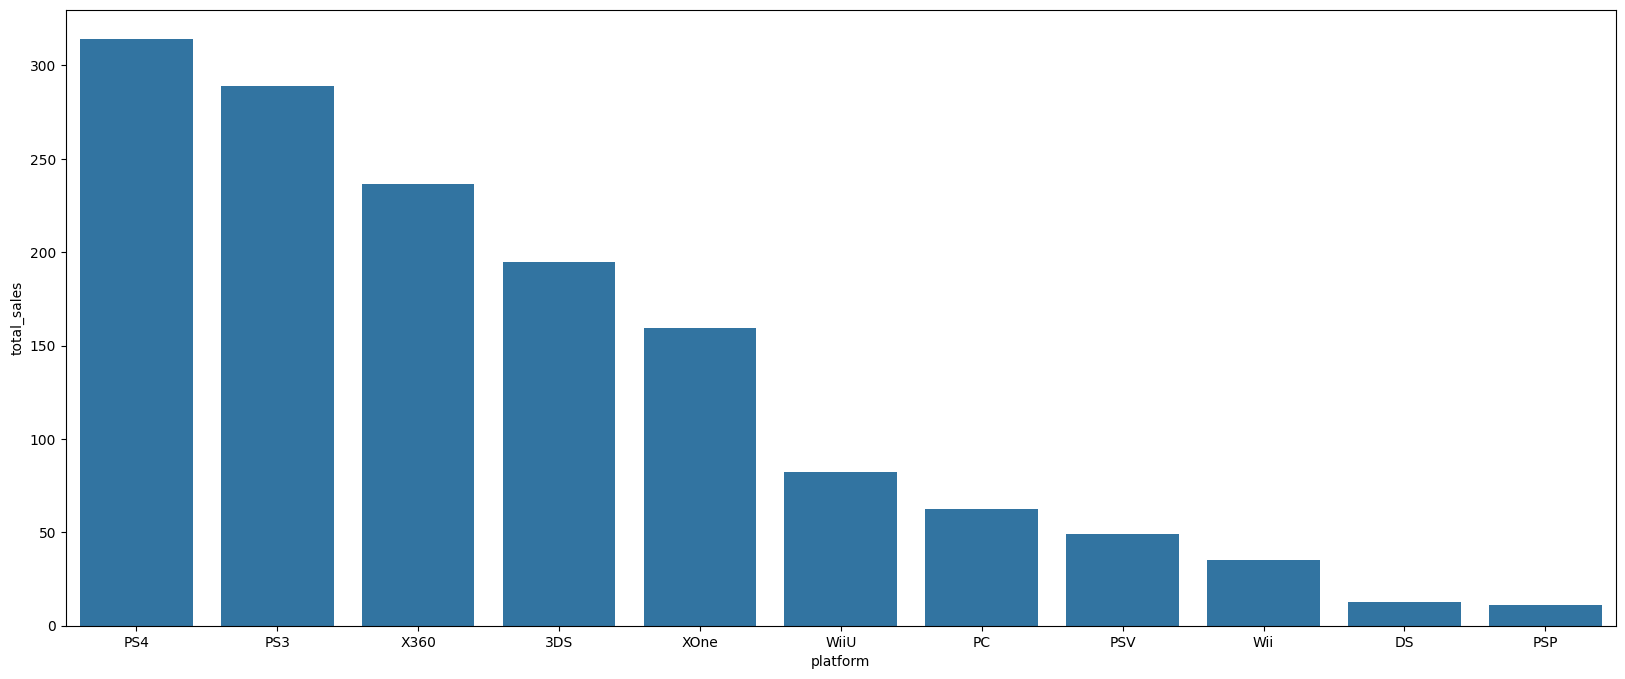

In [46]:
plt.figure(figsize=(20,8))
sns.barplot(data=new_df_platform_sales, x='platform', y='total_sales')

In [47]:
day_lifetime_2012 = pd.pivot_table(new_df, index='year_of_release',
                              columns='platform', values='total_sales', aggfunc='sum').fillna(0).astype('int')

In [48]:
day_lifetime_2012

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51,11,23,107,0,7,16,21,17,99,0
2013,56,1,12,113,25,3,10,8,21,88,18
2014,43,0,13,47,100,0,11,3,22,34,54
2015,27,0,8,16,118,0,6,1,16,11,60
2016,15,0,5,3,69,0,4,0,4,1,26


<Axes: xlabel='year_of_release'>

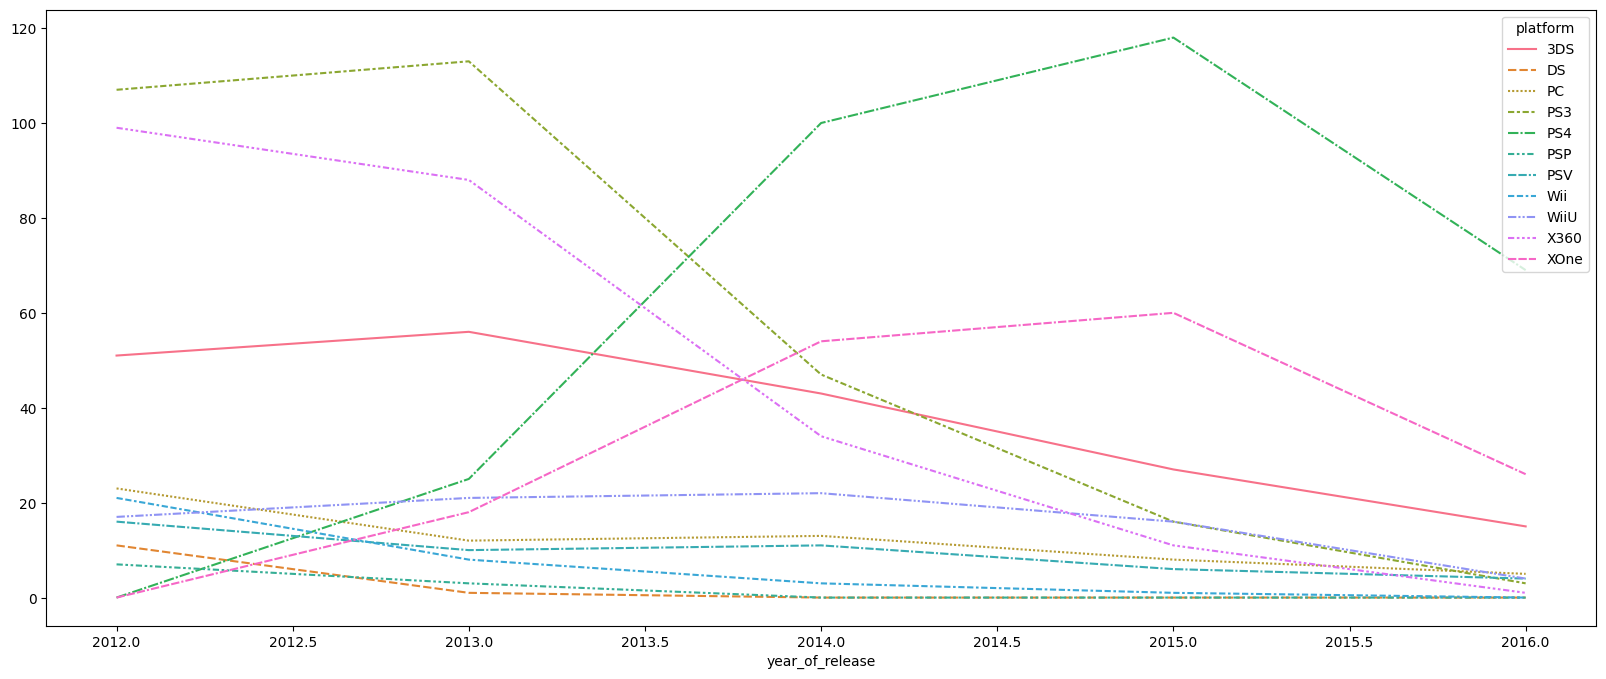

In [49]:
plt.figure(figsize=(20,8))
sns.lineplot(data=day_lifetime_2012)

The analysis of top-selling platforms and their sales trends over recent years reveals insightful dynamics within the video game industry. By aggregating total sales by platform and examining the annual distribution, we gain a comprehensive view of market leaders and shifting consumer preferences.

The data indicates that PS4 leads with a significant total of 314.14 million units sold, followed closely by its predecessor, PS3, with 288.79 million units, and the Xbox 360 with 236.54 million units. This hierarchy underscores the dominance of console gaming, particularly within the Sony and Microsoft ecosystems. The Nintendo 3DS and Xbox One also show strong sales, highlighting the varied tastes among gamers, who favor both handheld gaming experiences and traditional console gaming.

The pivot table detailing annual sales per platform from 2012 to 2016 provides a deeper dive into sales trends, revealing the lifecycle and peak sales periods of each platform. For instance, PS4 sales show a significant increase from its launch year in 2013, peaking in 2015, which illustrates a rapid adoption rate and a strong market presence. In contrast, PS3 and X360, despite their high total sales, show a declining trend post-2013, indicating the natural decline as the market transitions to newer generations of consoles.

The Nintendo 3DS presents an interesting case of consistent performance with a gradual decline, suggesting a stable but shrinking market segment for handheld consoles, likely impacted by the rise of mobile gaming. The WiiU and PSVita show more modest sales figures and sharper declines, pointing to challenges in competing within a market that favors more dominant consoles and portable gaming experiences offered by smartphones.

Moreover, the emergence of the Xbox One and its growth trajectory, while not reaching the heights of the PS4, underscores the competitive nature of the console market and the importance of exclusive titles and platform features that can attract a dedicated user base.

The graphical representation of these trends through bar and line charts not only visualizes the dominance of certain platforms but also illustrates the shifting sands of platform popularity over time. The decline of older platforms like the Wii, DS, and PSP, as sales trickle to a halt, is a testament to the rapid evolution of technology and consumer expectations in the video game industry.

In conclusion, this analysis reveals not just the top-selling platforms but also the dynamics of growth and decline that characterize the video game market. It highlights the importance of innovation, the impact of new platform introductions, and the enduring appeal of established console brands. For industry stakeholders, understanding these trends is crucial for strategic planning, from the development of new games to the marketing strategies employed to capture the attention of a diverse and evolving audience of gamers.

## Create a boxplot for global game sales grouped by platform, comparing sales distributions and averages.

Is the difference in sales significant? What about average sales on various platforms? Describe your discovery.

<Axes: xlabel='platform', ylabel='total_sales'>

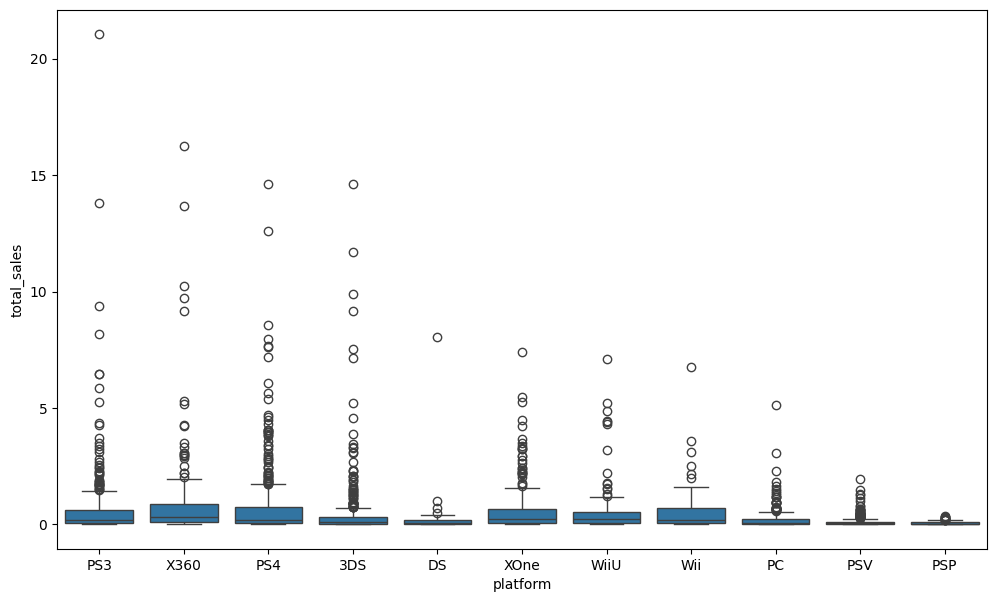

In [50]:
plt.figure(figsize=(12,7))
sns.boxplot(data=new_df, x='platform', y='total_sales')

<Axes: xlabel='platform', ylabel='total_sales'>

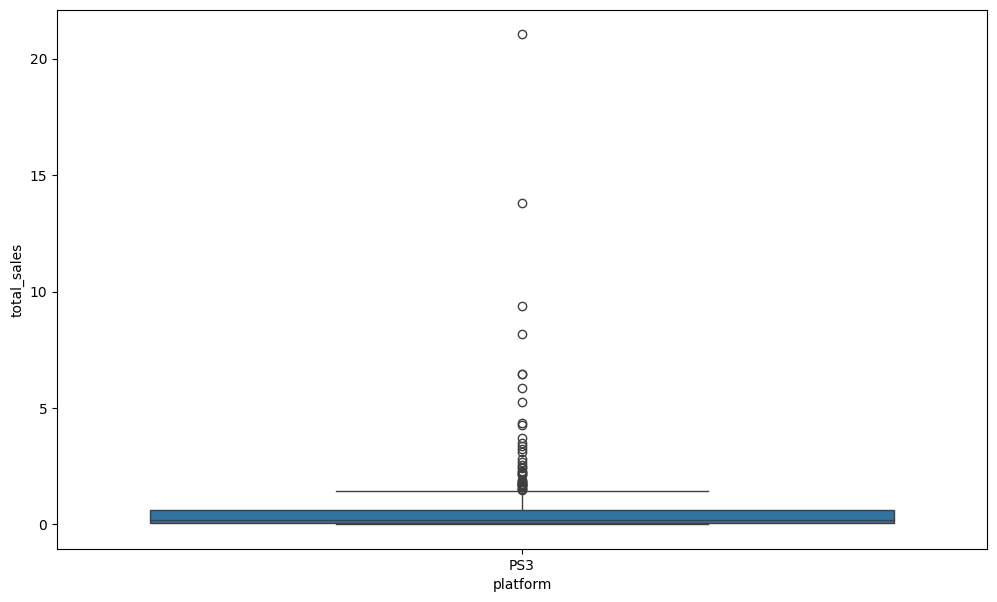

In [51]:
plt.figure(figsize=(12,7))
sns.boxplot(data=new_df[new_df['platform']=='PS3'], x='platform', y='total_sales')

In [52]:
new_df.groupby(['platform'])['total_sales'].mean().sort_values(ascending=False).reset_index()

,platform,total_sales
0,X360,0.810068
1,PS4,0.801378
2,Wii,0.655000
3,XOne,0.645020
4,PS3,0.585781
5,WiiU,0.559116
6,3DS,0.491439
7,DS,0.404839
8,PC,0.250600
9,PSV,0.119659



The boxplot visualization and the analysis of average sales by platform offer a nuanced understanding of global game sales across different gaming platforms. This comparison not only showcases the range and distribution of sales but also highlights the average performance of titles across these platforms, providing valuable insights into the market dynamics.

From the boxplot, we observe significant variability in sales distributions across platforms. Some platforms, like PS4, X360, and PS3, not only have higher total sales but also exhibit a wide range of sales outcomes for individual games, indicating a mix of both blockbuster titles and lower-selling games. This wide range is reflective of these platforms' broad and diverse game libraries, appealing to a wide audience. The presence of outliers in these platforms suggests that while most games achieve moderate success, a few exceptional titles achieve extraordinary sales, pulling up the average.

Conversely, platforms like PSP, PSV, and DS show more condensed sales distributions with fewer outliers, suggesting a more uniform performance across their game libraries but with lower sales figures on average. This could indicate a narrower market or a more niche appeal for games on these platforms.

The analysis of average sales per platform further clarifies these observations. The Xbox 360 and PS4 lead with average sales of 0.81 and 0.80 million units per game, respectively, closely followed by the Wii, Xbox One, and PS3. These figures underscore the strong market presence of these consoles, driven by high-performing titles. Notably, the Wii's average is impressive given its broader family-friendly game portfolio, which may not typically target the hardcore gaming demographic that often drives high sales volumes.

In contrast, platforms like the PSV and PSP have significantly lower average sales, highlighting challenges in reaching broader audiences or the impact of a more limited game selection. The PC's average sales position it in the middle of the pack, reflecting a diverse PC gaming ecosystem that ranges from indie titles to big-budget AAA games, resulting in a wide variance in sales performance.

The significant differences in sales distributions and averages across platforms reveal the highly competitive nature of the video game industry. They highlight how platform choice can influence game sales, with certain platforms providing a more lucrative environment for blockbuster titles due to their large installed user bases and the demographic profiles of their gamers.

In summary, this analysis not only sheds light on the hierarchy of platform success in the gaming industry but also underscores the importance of aligning game development and marketing strategies with the right platform to maximize sales potential. It reveals a complex landscape where strategic decisions about platform targeting can make or break a game's commercial success.

## Investigate the correlation between user/professional reviews and sales for a chosen platform.

Create a scatter plot and calculate the correlation between reviews and sales. Then, draw conclusions.

In [53]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [57]:
df_PS4 = new_df.groupby(['platform', 'name'])[['total_sales', 'critic_score', 'user_score']].sum().query('platform == "PS4" & critic_score>0 & user_score>0').reset_index()

In [58]:
df_PS4

,platform,name,total_sales,critic_score,user_score
0,PS4,7 Days to Die,0.14,45.0,5.9
1,PS4,Aegis of Earth: Protonovus Assault,0.02,57.0,7.8
2,PS4,Agatha Christie's The ABC Murders,0.02,67.0,6.2
3,PS4,Alien: Isolation,1.12,79.0,8.1
4,PS4,Angry Birds Star Wars,0.22,47.0,2.0
...,...,...,...,...,...
244,PS4,World of Final Fantasy,0.34,77.0,8.3
245,PS4,Worms: WMD,0.03,78.0,7.6
246,PS4,XCOM 2,0.14,88.0,8.0
247,PS4,Zombie Army Trilogy,0.20,62.0,6.8


In [62]:
numeric_cols = ['total_sales', 'critic_score', 'user_score']
df_PS4_numeric = df_PS4[numeric_cols]
df_PS4_corr = df_PS4_numeric.corr()['total_sales'].sort_values(ascending=False)
df_PS4_corr

total_sales     1.000000
critic_score    0.405895
user_score     -0.033625
Name: total_sales, dtype: float64

<Axes: >

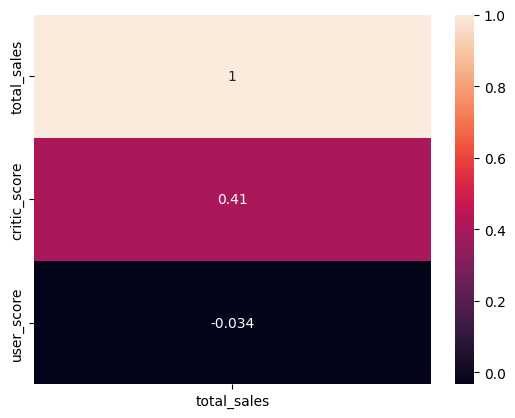

In [65]:
df_PS4_corr_df = df_PS4_corr.to_frame()  # Convert a Series object to a DataFrame
sns.heatmap(df_PS4_corr_df, annot=True)

<Axes: xlabel='critic_score', ylabel='total_sales'>

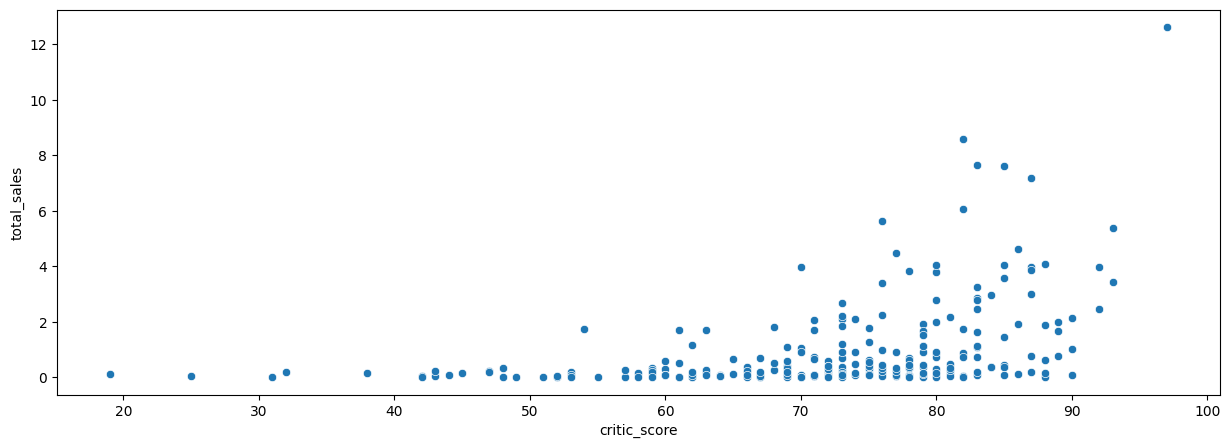

In [66]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_PS4, x='critic_score', y='total_sales')

<Axes: xlabel='user_score', ylabel='total_sales'>

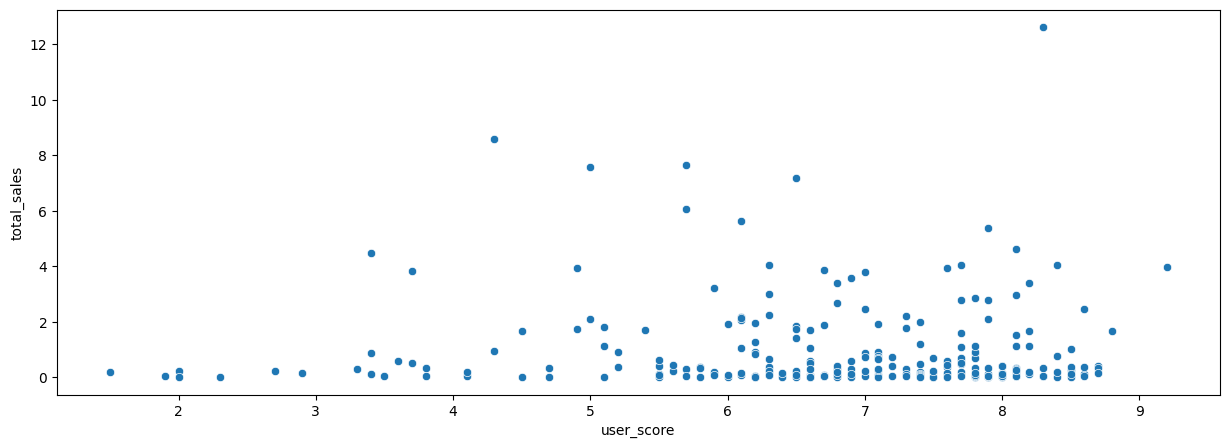

In [67]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_PS4, x='user_score', y='total_sales')

The analysis focuses on investigating the correlation between professional (critic) and user reviews with sales for the PS4 platform.

First, the data is prepared by selecting only the relevant columns ('total_sales', 'critic_score', 'user_score') for PS4 games with available critic and user scores. Then, the correlation coefficients between total sales and critic/user scores are calculated.

The correlation coefficients indicate the strength and direction of the linear relationship between variables, ranging from -1 to 1. A value closer to 1 suggests a strong positive correlation, while a value closer to -1 indicates a strong negative correlation. A value around 0 implies no linear correlation.

The correlation coefficients for PS4 games are as follows:
* Total Sales vs. Critic Score: 0.406 (moderate positive correlation)
* Total Sales vs. User Score: -0.034 (weak negative correlation)

The scatter plots visualize the relationships between sales and critic/user scores. From the scatter plots, we can observe:
* For critic scores, there seems to be a moderate positive trend, indicating that higher critic scores are associated with higher sales, but there is also considerable variance in sales at each score level.
* For user scores, there is no clear linear relationship evident, as the points are scattered without any discernible pattern.

These findings suggest that while there is a moderate positive correlation between critic scores and sales for PS4 games, the relationship between user scores and sales is weak and not significant. Other factors beyond user reviews may influence game sales on the PS4 platform.

Keeping your conclusions in mind, compare the sales of the same game on other platforms.

In [69]:
df_X360 = new_df.groupby(['platform', 'name'])[['total_sales', 'critic_score', 'user_score']].sum().query('platform == "X360" & critic_score>0 & user_score>0').reset_index()

In [70]:
df_X360

,platform,name,total_sales,critic_score,user_score
0,X360,2014 FIFA World Cup Brazil,0.43,74.0,4.4
1,X360,Adventure Time: The Secret of the Nameless Kin...,0.05,58.0,7.5
2,X360,Aliens: Colonial Marines,0.77,48.0,3.8
3,X360,Anarchy Reigns,0.17,73.0,7.9
4,X360,Angry Birds Star Wars,0.28,59.0,5.6
...,...,...,...,...,...
166,X360,Yaiba: Ninja Gaiden Z,0.04,50.0,5.3
167,X360,Zone of the Enders HD Collection,0.20,75.0,8.8
168,X360,Zumba Fitness Core,0.05,77.0,6.7
169,X360,Zumba Fitness Rush,0.18,73.0,6.2


In [71]:
numeric_cols = ['total_sales', 'critic_score', 'user_score']
df_X360_numeric = df_X360[numeric_cols]
df_X360_corr = df_X360_numeric.corr()['total_sales'].sort_values(ascending=False)
df_X360_corr

total_sales     1.000000
critic_score    0.360573
user_score     -0.002014
Name: total_sales, dtype: float64

<Axes: >

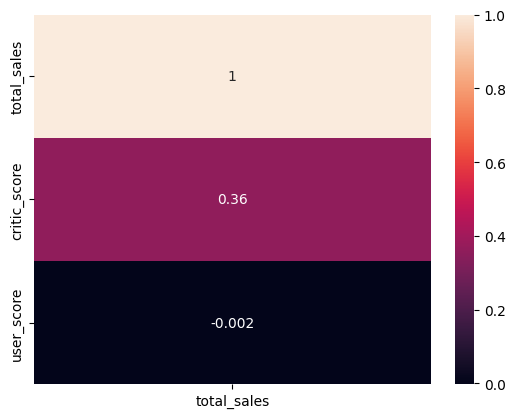

In [72]:
df_X360_corr_df = df_X360_corr.to_frame()  # Convert a Series object to a DataFrame
sns.heatmap(df_X360_corr_df, annot=True)

<Axes: xlabel='critic_score', ylabel='total_sales'>

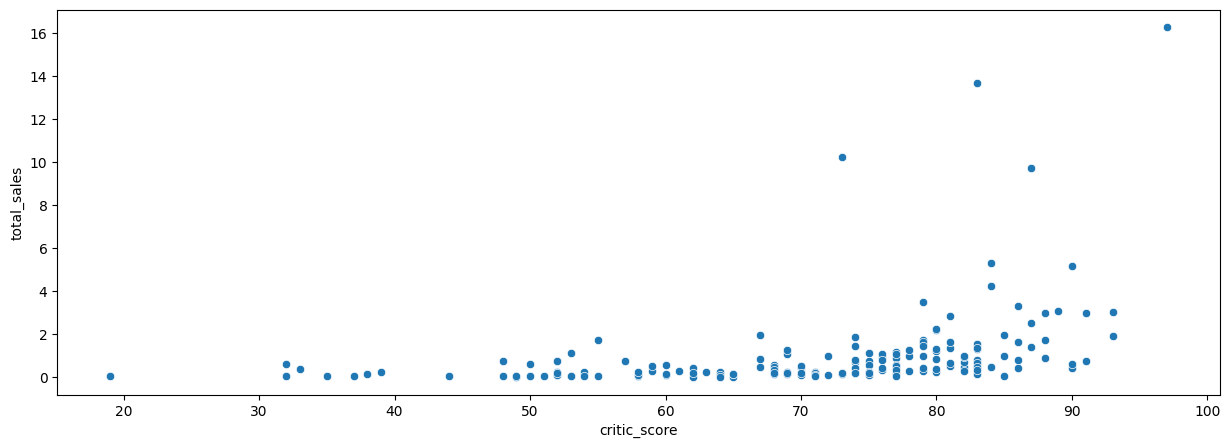

In [73]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_X360, x='critic_score', y='total_sales')

<Axes: xlabel='user_score', ylabel='total_sales'>

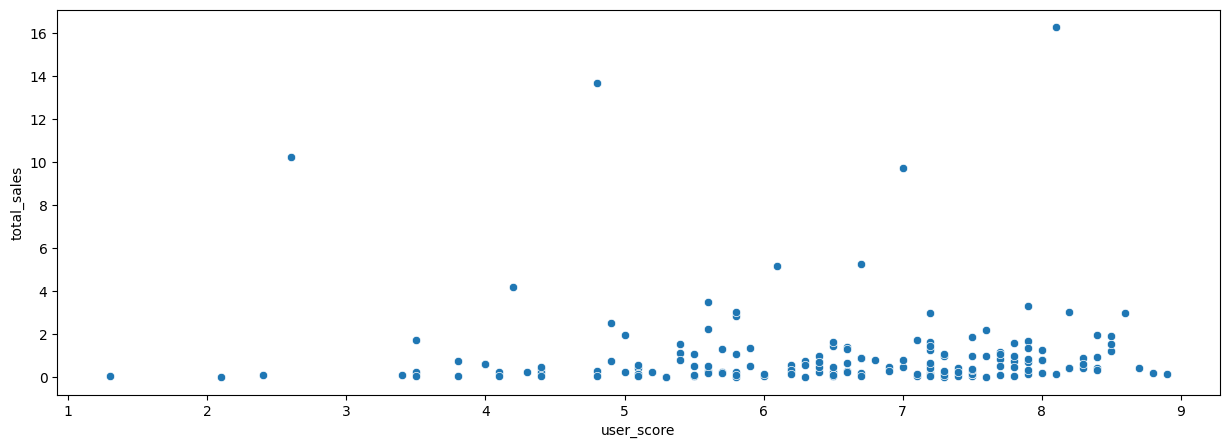

In [74]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_X360, x='user_score', y='total_sales')

Similar to the previous analysis for the PS4 platform, this analysis focuses on investigating the correlation between professional (critic) and user reviews with sales, but this time for the Xbox 360 (X360) platform.

First, the data is prepared by selecting only the relevant columns ('total_sales', 'critic_score', 'user_score') for Xbox 360 games with available critic and user scores. Then, the correlation coefficients between total sales and critic/user scores are calculated.

The correlation coefficients for Xbox 360 games are as follows:

Total Sales vs. Critic Score: 0.361 (moderate positive correlation)
Total Sales vs. User Score: -0.002 (very weak negative correlation)
The scatter plots visualize the relationships between sales and critic/user scores for Xbox 360 games. From the scatter plots, we can observe:

For critic scores, there seems to be a moderate positive trend, indicating that higher critic scores are associated with higher sales, but there is also considerable variance in sales at each score level.
For user scores, there is no clear linear relationship evident, as the points are scattered without any discernible pattern.
These findings suggest that, similar to the PS4 platform, there is a moderate positive correlation between critic scores and sales for Xbox 360 games. However, the relationship between user scores and sales is very weak and not significant. Other factors beyond user reviews may also influence game sales on the Xbox 360 platform.

# Stage 3: Genre Analysis

What can we conclude regarding the most profitable genres? Can you generalize regarding genres with high and low sales?

In [75]:
new_df['genre'].value_counts()

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: count, dtype: int64

In [76]:
df_genre = new_df.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

In [77]:
df_genre

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


<Axes: xlabel='genre', ylabel='total_sales'>

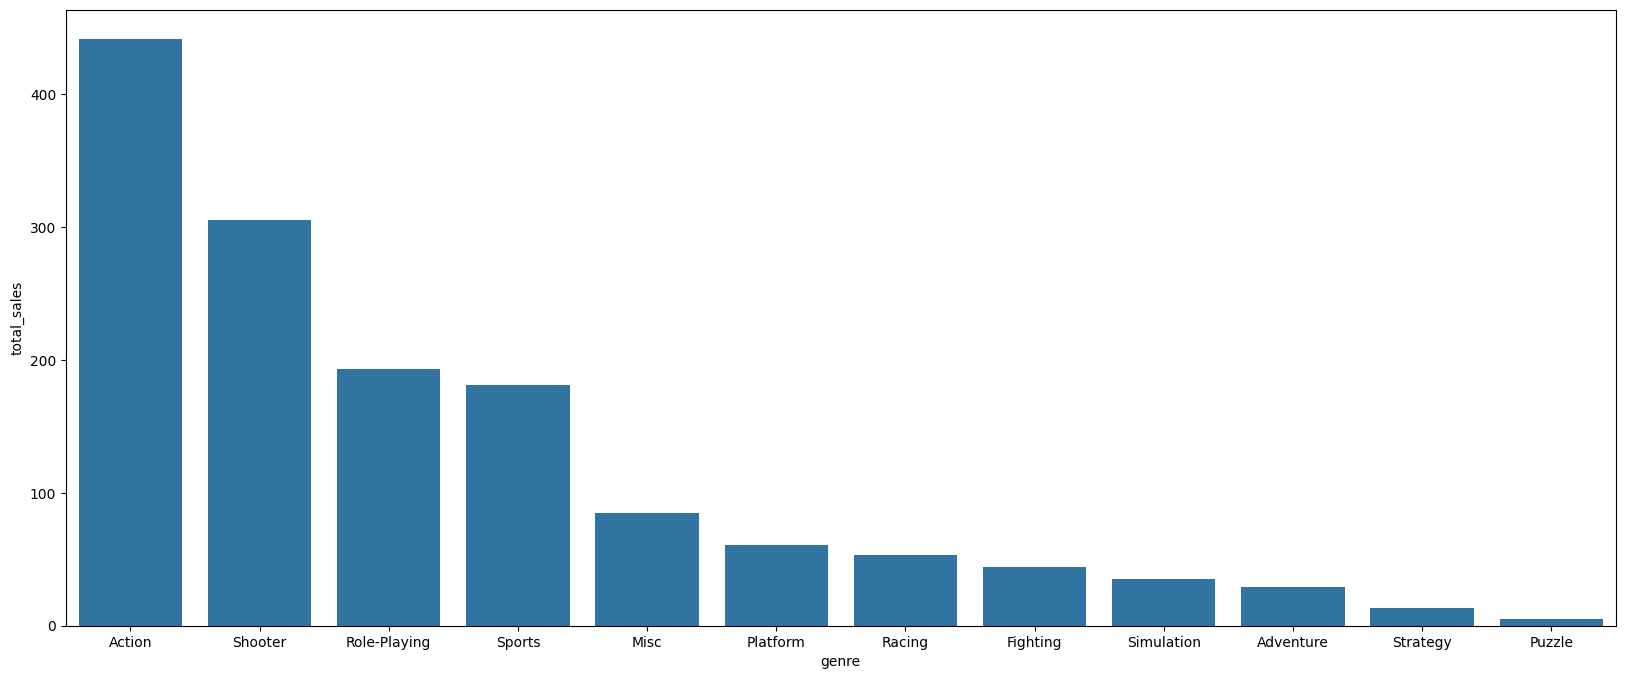

In [78]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_genre, x='genre', y='total_sales')

In [79]:
df_genre_2 = new_df.groupby(['genre', 'name'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

In [80]:
df_genre_2

,genre,name,total_sales
200,Action,Grand Theft Auto V,56.58
1382,Shooter,Call of Duty: Black Ops II,29.40
1383,Shooter,Call of Duty: Ghosts,27.39
1381,Shooter,Call of Duty: Black Ops 3,25.67
920,Misc,Minecraft,24.16
...,...,...,...
214,Action,Hakuoki: Reimeiroku DS,0.01
213,Action,Hakuoki: Reimeiroku - Omouhase Kara,0.01
1379,Shooter,Caladrius,0.01
835,Fighting,Saint Seiya Omega: Ultimate Cosmo,0.01


<Axes: xlabel='genre', ylabel='total_sales'>

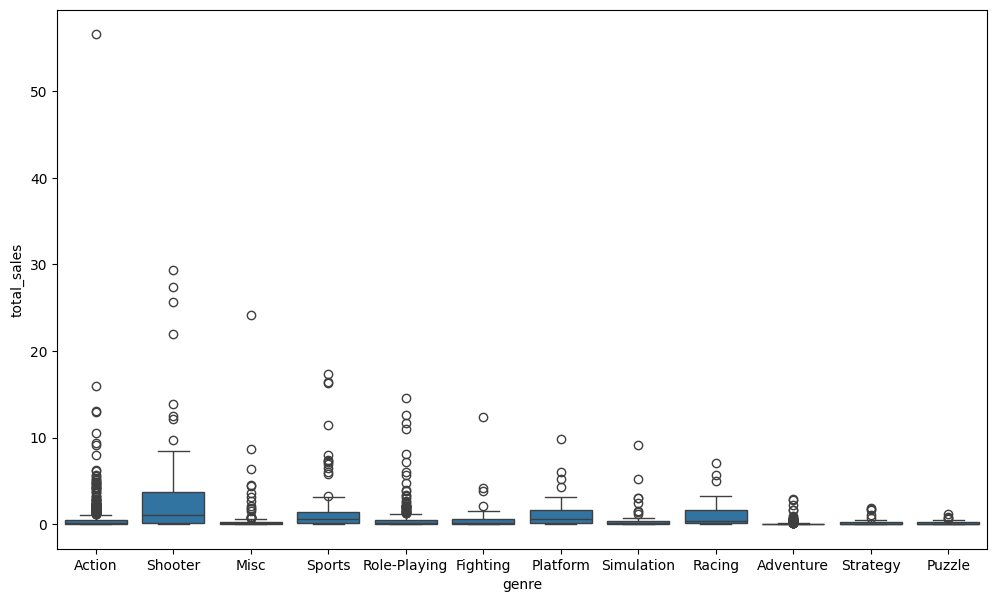

In [81]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df_genre_2, x='genre', y='total_sales')

**Conclusion**

From the genre analysis, several conclusions can be drawn regarding the profitability of different genres and generalizations regarding genres with high and low sales:

1. Most Profitable Genres:
  * The top five most profitable genres in terms of total sales are Action, Shooter, Role-Playing, Sports, and Misc.
  * Action games have the highest total sales, followed by Shooter and Role-Playing games.
2. Generalizations Regarding Genres with High Sales:
  * Action, Shooter, Role-Playing, and Sports genres tend to have higher total sales compared to other genres.
  * These genres often feature fast-paced gameplay, immersive narratives, competitive multiplayer modes, or popular sports themes, which appeal to a broad audience and drive higher sales.
3. Generalizations Regarding Genres with Low Sales:
  * Puzzle and Strategy genres have relatively low total sales compared to other genres.
  * These genres typically require more strategic thinking and may have a niche audience compared to genres like Action and Shooter.
4. Insights from Boxplot Visualization:
  * The boxplot visualization provides a clearer picture of the sales distribution within each genre.
  * Action, Shooter, and Role-Playing genres have wider interquartile ranges and more outliers, indicating greater variability in sales among games within these genres.
  * Puzzle and Strategy genres have narrower interquartile ranges and fewer outliers, suggesting more consistency in sales among games within these genres but generally lower overall sales.

Overall, the analysis highlights the importance of genre selection in determining game sales. Developers and publishers may prioritize genres like Action, Shooter, Role-Playing, and Sports to maximize sales potential, while being aware of the potential niche appeal and lower sales associated with genres like Puzzle and Strategy. Additionally, understanding the sales distribution within each genre can inform marketing strategies and investment decisions in game development.

# Stage 4: Regional User Profiling

## Determine the top 5 platforms for each region (NA, EU, JP), highlighting market share variations.

In [82]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [83]:
new_df.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


In [85]:
platform_sales_agg = new_df.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

In [86]:
platform_sales_agg

,platform,na_sales,eu_sales,jp_sales
0,3DS,55.31,42.64,87.79
1,DS,4.59,3.53,3.72
2,PC,19.12,37.76,0.00
3,PS3,103.38,106.86,35.29
4,PS4,108.74,141.09,15.96
5,PSP,0.13,0.42,10.47
6,PSV,10.98,11.36,21.04
7,Wii,17.45,11.92,3.39
8,WiiU,38.10,25.13,13.01
9,X360,140.05,74.52,1.57


<Axes: xlabel='platform', ylabel='na_sales'>

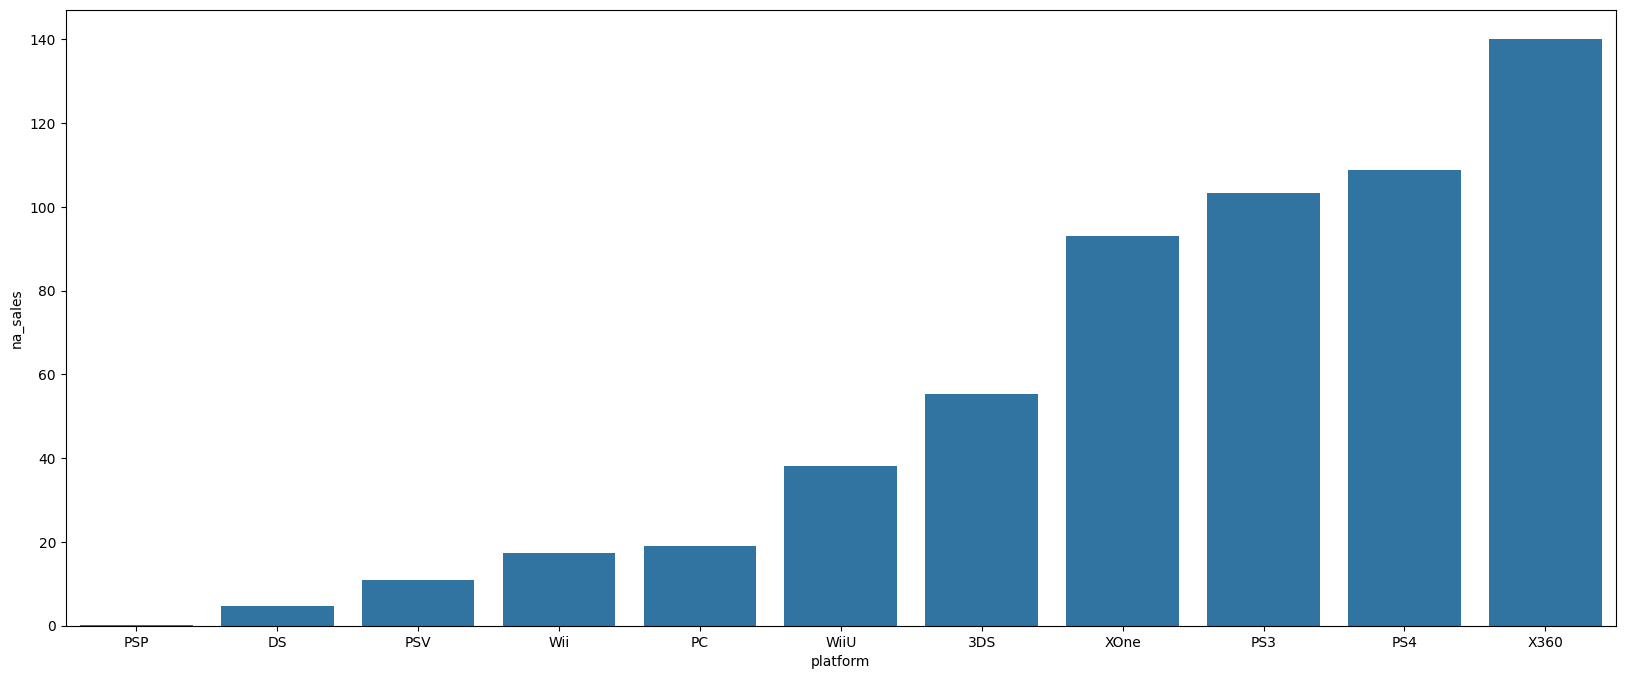

In [87]:
plt.figure(figsize=(20,8))
sns.barplot(data=platform_sales_agg.sort_values(by='na_sales'), x='platform', y='na_sales')

<Axes: xlabel='platform', ylabel='eu_sales'>

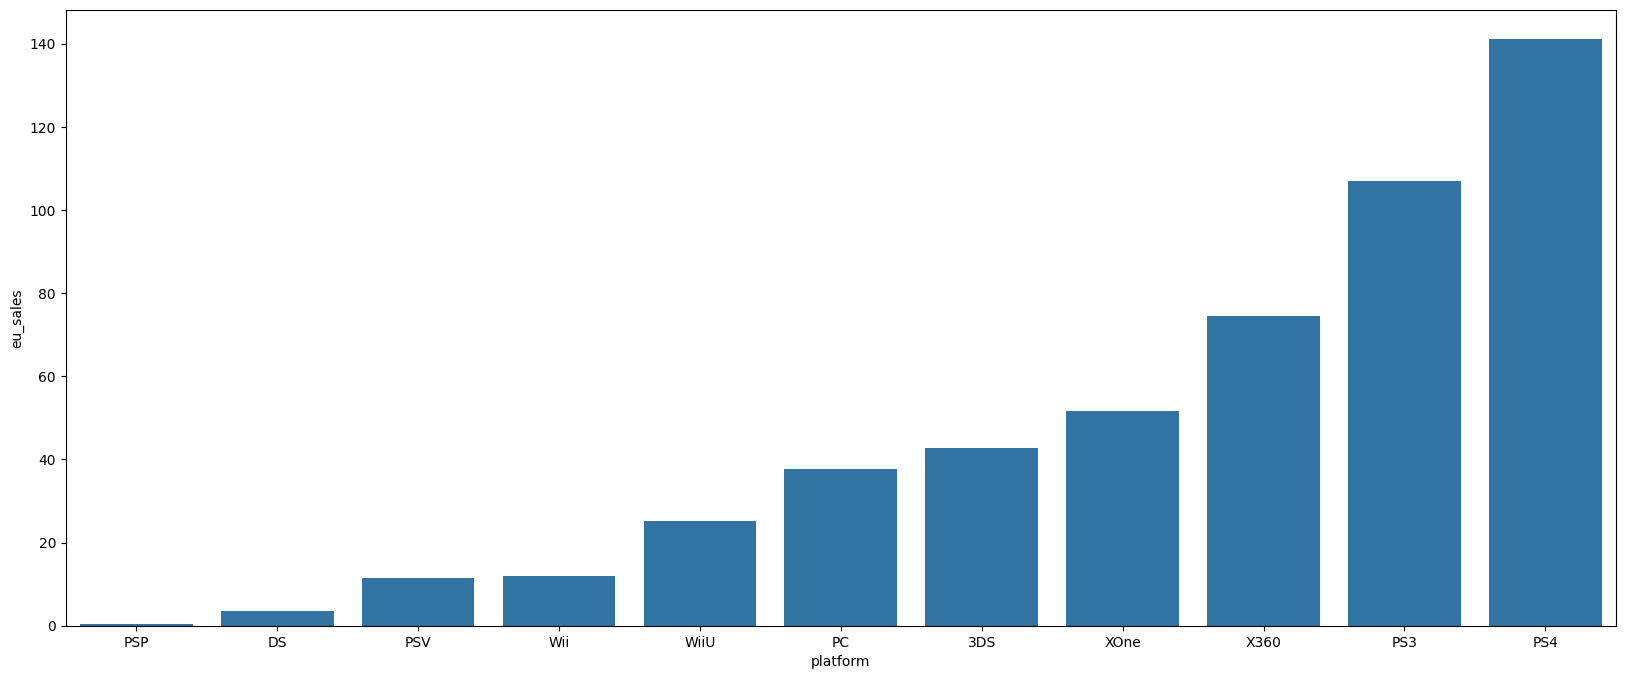

In [88]:
plt.figure(figsize=(20,8))
sns.barplot(data=platform_sales_agg.sort_values(by='eu_sales'), x='platform', y='eu_sales')

<Axes: xlabel='platform', ylabel='jp_sales'>

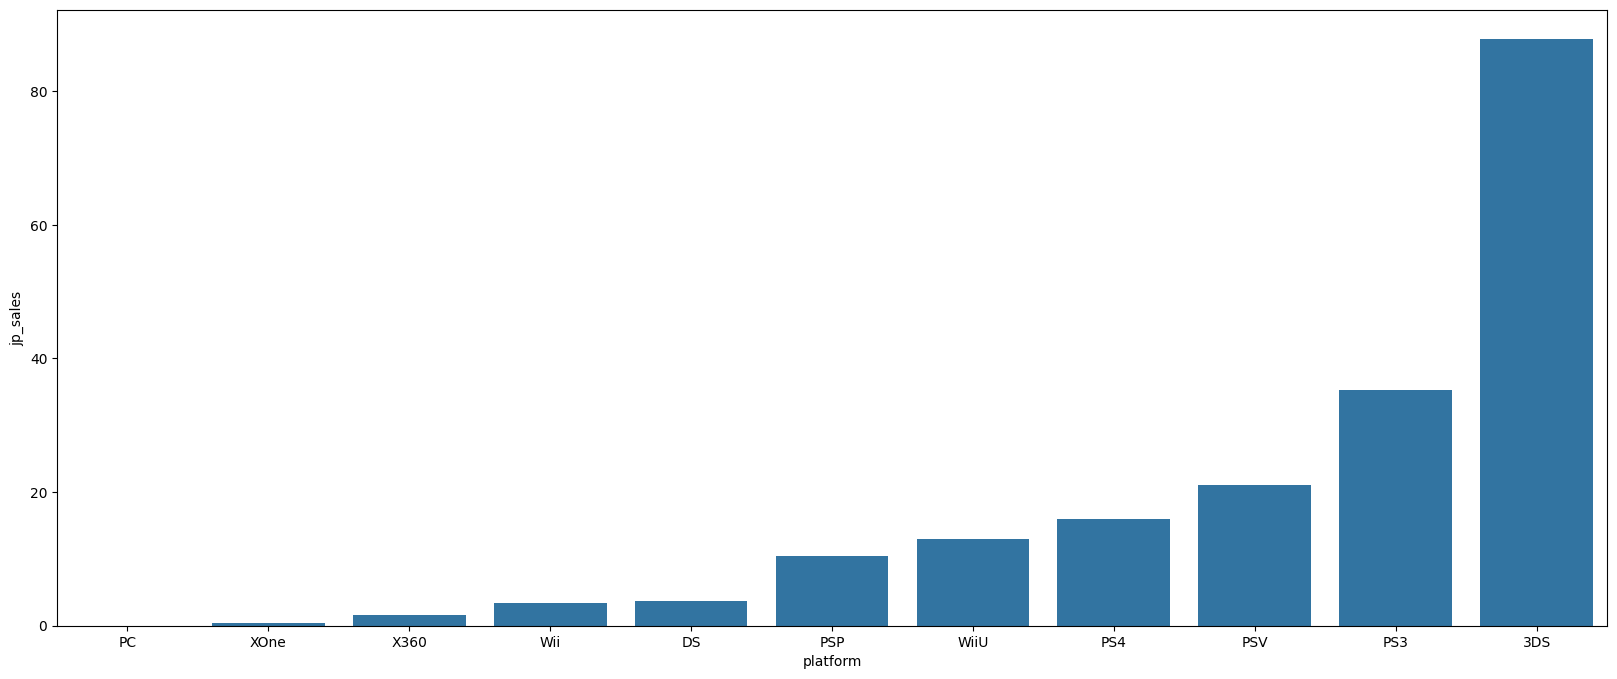

In [89]:
plt.figure(figsize=(20,8))
sns.barplot(data=platform_sales_agg.sort_values(by='jp_sales'), x='platform', y='jp_sales')

**Conclusion**

From the analysis of platform sales in different regions (NA, EU, JP), the following conclusions and insights can be drawn:

1. Top 5 Platforms in Each Region:
  * North America (NA): The top 5 platforms based on total sales in NA are X360, PS4, PS3, XOne, and WiiU.
  * Europe (EU): The top 5 platforms based on total sales in EU are PS4, X360, PS3, WiiU, and XOne.
  * Japan (JP): The top 5 platforms based on total sales in JP are 3DS, PS3, PSV, PS4, and WiiU.
2. Market Share Variations:
  * X360 and PS4 dominate the North American market, with X360 leading in total sales.
  * In Europe, PS4 leads in total sales, followed by X360 and PS3. The market share of PS4 is notably higher in EU compared to other regions.
  * The Japanese market shows a preference for handheld consoles, with 3DS leading in total sales. PS3 and PSV also have significant sales in JP.
3. Insights from Barplots:
  * The barplots illustrate the sales distribution of each platform across different regions.
  * It's evident that certain platforms perform better in specific regions. For example, X360 has higher sales in NA, while PS4 performs exceptionally well in both EU and NA markets.
  * The dominance of handheld consoles like 3DS and PSV in the Japanese market reflects the preference for portable gaming devices in Japan.
4. Implications for Market Strategy:
  * Game developers and publishers should tailor their marketing and game development strategies based on regional preferences and platform popularity.
  * Understanding market share variations can help allocate resources effectively and prioritize platform compatibility for game releases.
  * Expanding market reach may require targeted promotional efforts and adaptations to appeal to the preferences of specific regions.

Overall, analyzing platform sales across different regions provides valuable insights into market dynamics and informs strategic decision-making for stakeholders in the gaming industry.

## Determine the top 5 genres for each region (NA, EU, JP), highlighting market share variations.

In [90]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [91]:
new_df.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False).reset_index()

,genre,total_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.07
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


In [93]:
genre_sales_agg = new_df.groupby(['genre'])[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

In [94]:
genre_sales_agg

,genre,na_sales,eu_sales,jp_sales
0,Action,177.84,159.34,52.80
1,Adventure,8.92,9.46,8.24
2,Fighting,19.79,10.79,9.44
3,Misc,38.19,26.32,12.86
4,Platform,25.38,21.41,8.63
5,Puzzle,1.13,1.40,2.14
6,Racing,17.22,27.29,2.50
7,Role-Playing,64.00,48.53,65.44
8,Shooter,144.77,113.47,9.23
9,Simulation,7.97,14.55,10.41


<Axes: xlabel='genre', ylabel='na_sales'>

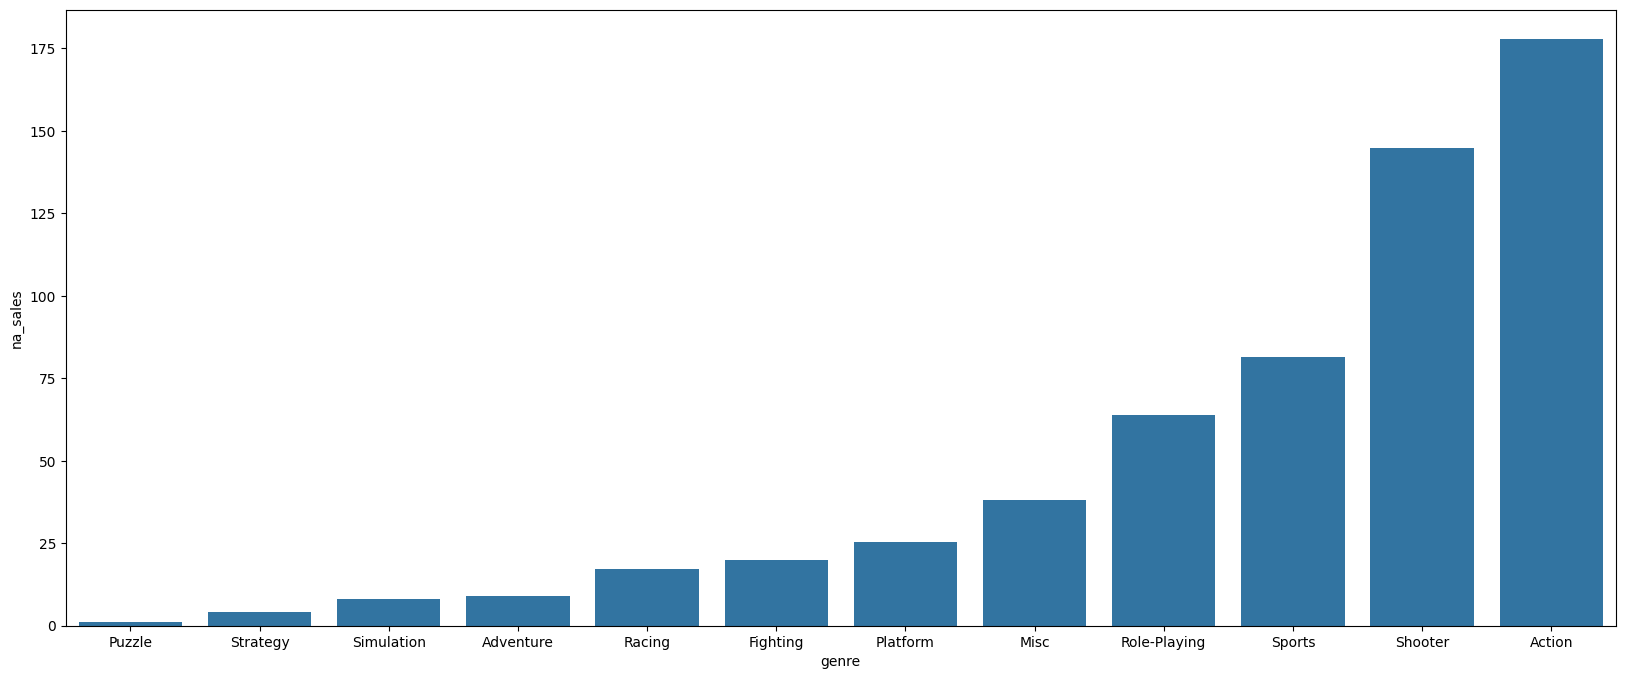

In [95]:
plt.figure(figsize=(20,8))
sns.barplot(data=genre_sales_agg.sort_values(by='na_sales'), x='genre', y='na_sales')

<Axes: xlabel='genre', ylabel='eu_sales'>

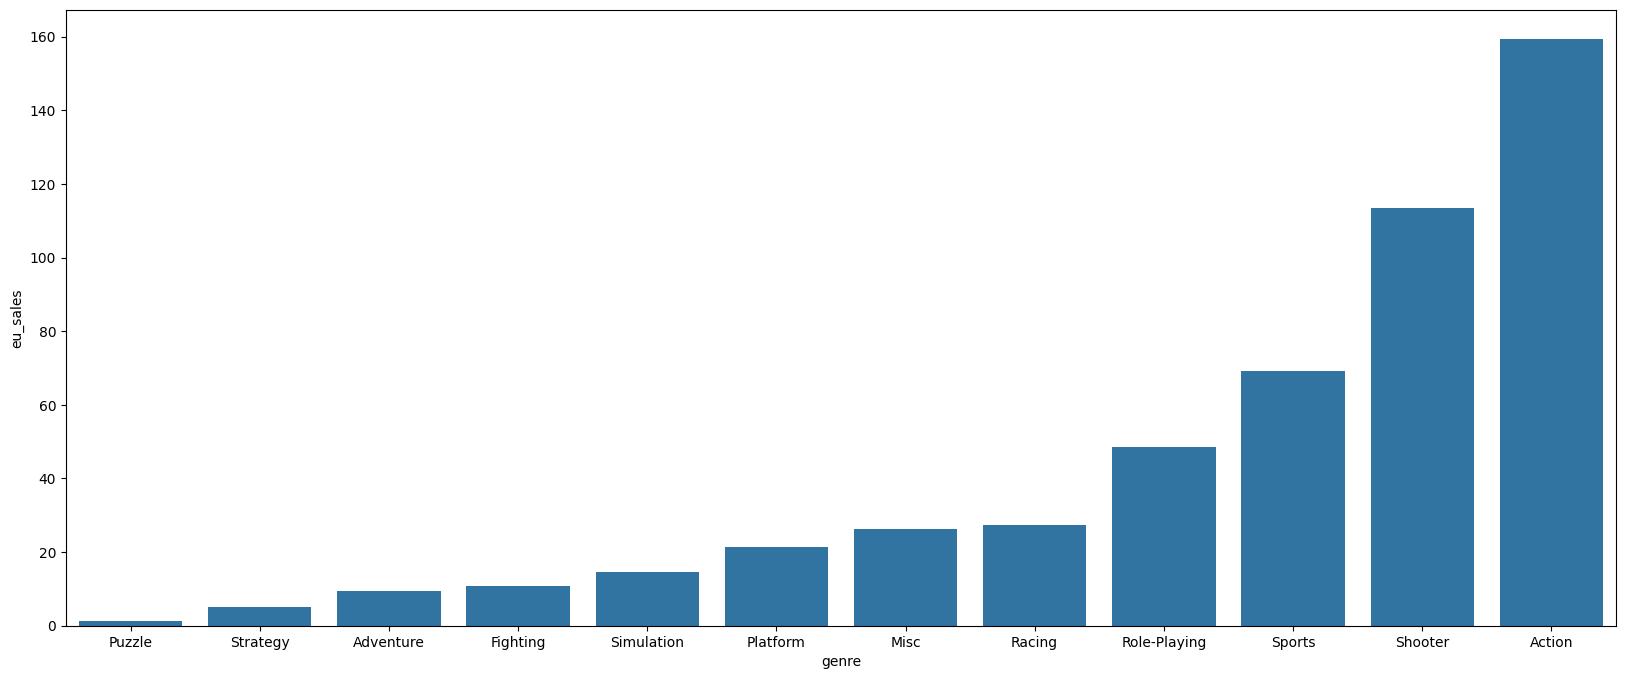

In [96]:
plt.figure(figsize=(20,8))
sns.barplot(data=genre_sales_agg.sort_values(by='eu_sales'), x='genre', y='eu_sales')

<Axes: xlabel='genre', ylabel='jp_sales'>

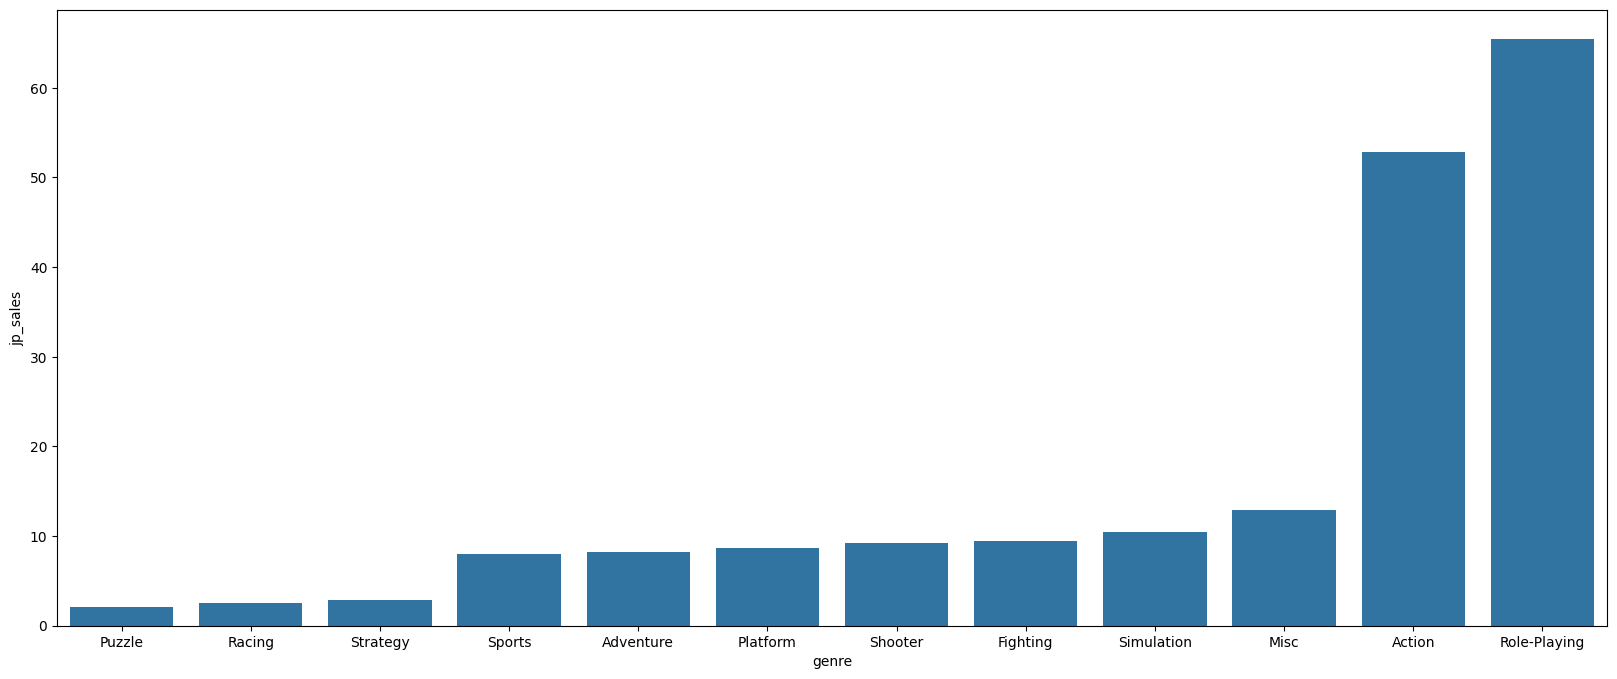

In [97]:
plt.figure(figsize=(20,8))
sns.barplot(data=genre_sales_agg.sort_values(by='jp_sales'), x='genre', y='jp_sales')

**Conclusion**


Based on the analysis of genre sales in different regions (NA, EU, JP), the following conclusions and insights can be derived:

1. Top 5 Genres in Each Region:
  * North America (NA): The top 5 genres based on total sales in NA are Action, Shooter, Sports, Role-Playing, and Misc.
  * Europe (EU): The top 5 genres based on total sales in EU are Action, Shooter, Sports, Role-Playing, and Misc.
  * Japan (JP): The top 5 genres based on total sales in JP are Role-Playing, Action, Misc, Shooter, and Platform.
2. Market Share Variations:
  * Action and Shooter genres dominate both the North American and European markets, reflecting similar gaming preferences in these regions.
  * The Japanese market shows a notable preference for Role-Playing games, which have the highest sales in JP. This indicates a cultural preference for narrative-rich and character-driven gaming experiences in Japan.
  * Misc (Miscellaneous) genre also has significant sales across all regions, albeit to a lesser extent compared to Action and Shooter genres.
3. Insights from Barplots:
  * The barplots illustrate the sales distribution of each genre across different regions, highlighting variations in market preferences.
  * Action and Shooter genres consistently maintain high sales across all regions, suggesting their universal appeal to gamers worldwide.
  * Role-Playing genre stands out in the Japanese market, indicating a distinct gaming culture and preference for immersive storytelling and character development.
4. Implications for Market Strategy:
  * Game developers and publishers should consider regional gaming preferences when planning marketing strategies and game development initiatives.
  * Tailoring game content and marketing campaigns to cater to specific genre preferences in each region can enhance market penetration and sales performance.
  * Understanding market share variations helps in allocating resources effectively and optimizing game releases to maximize revenue potential in different regions.
  
In summary, analyzing genre sales across different regions provides valuable insights into regional gaming preferences and informs strategic decision-making for stakeholders in the gaming industry.

## Investigate the influence of ESRB ratings on sales in each region.

In [98]:
new_df['rating'].value_counts()

rating
M       498
T       412
E       395
E10+    306
Name: count, dtype: int64

In [100]:
rating_sales_agg = new_df.groupby(['rating'])[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

In [101]:
rating_sales_agg

,rating,na_sales,eu_sales,jp_sales
0,E,114.37,113.03,28.33
1,E10+,75.70,55.37,8.19
2,M,231.57,193.96,21.20
3,T,66.02,52.96,26.02


<Axes: xlabel='rating', ylabel='na_sales'>

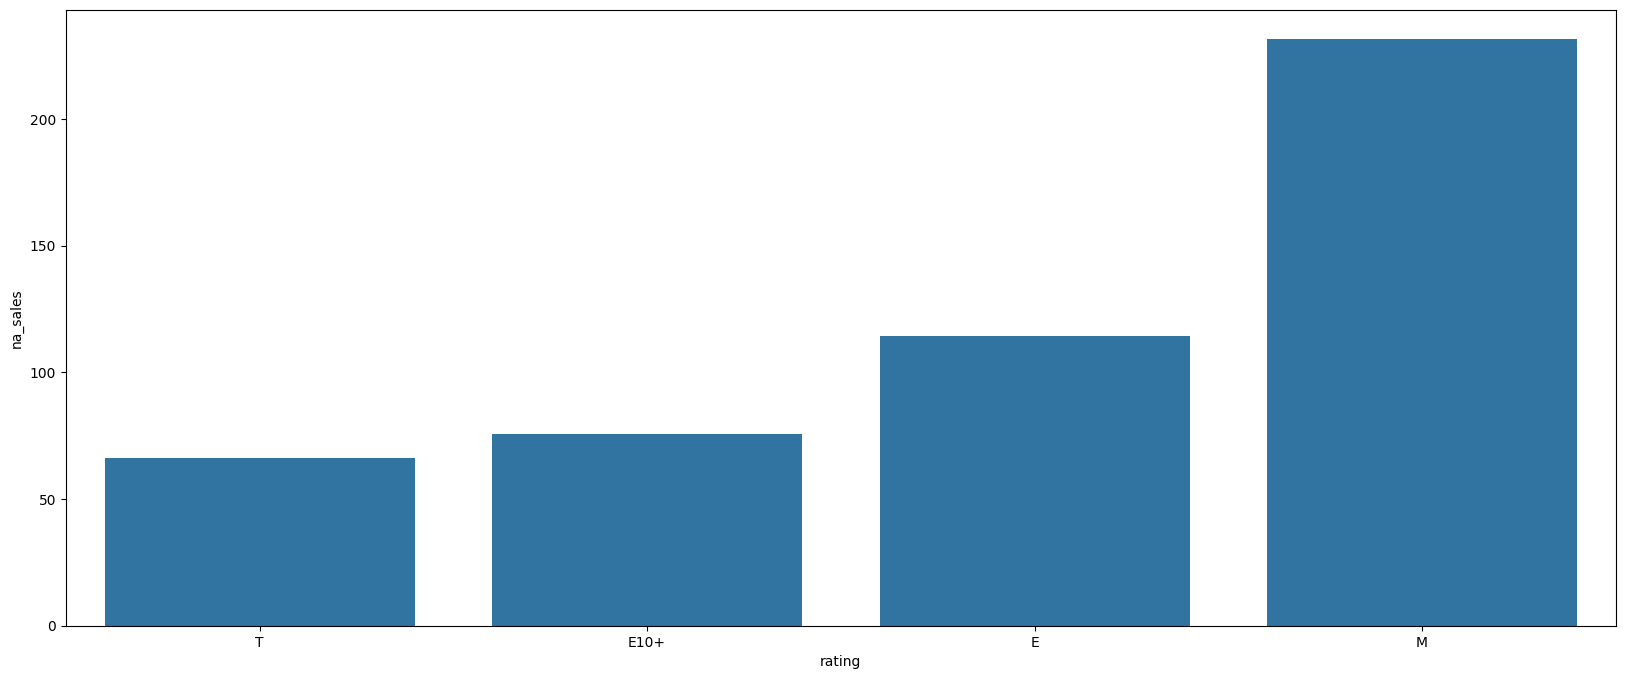

In [102]:
plt.figure(figsize=(20,8))
sns.barplot(data=rating_sales_agg.sort_values(by='na_sales'), x='rating', y='na_sales')

<Axes: xlabel='rating', ylabel='eu_sales'>

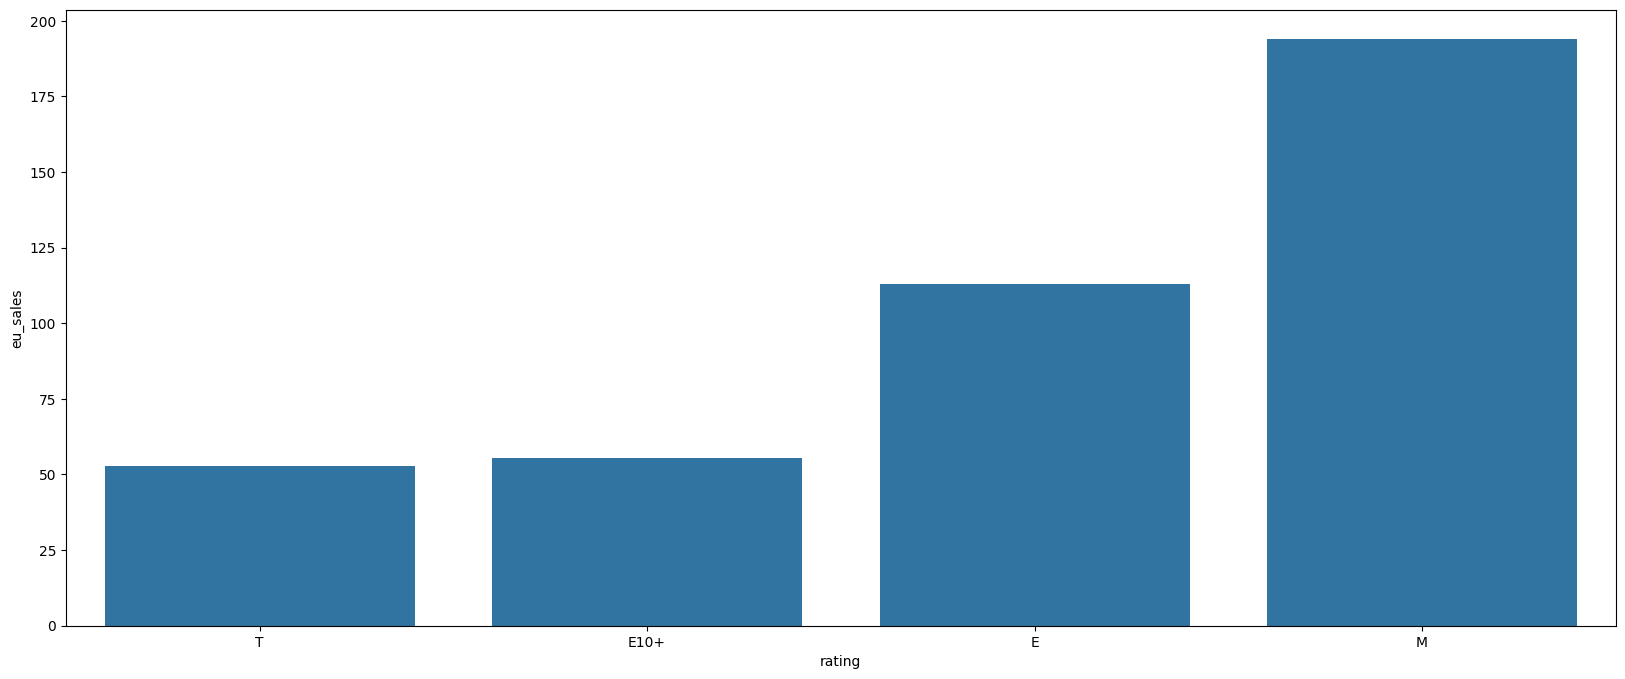

In [103]:
plt.figure(figsize=(20,8))
sns.barplot(data=rating_sales_agg.sort_values(by='eu_sales'), x='rating', y='eu_sales')

<Axes: xlabel='rating', ylabel='jp_sales'>

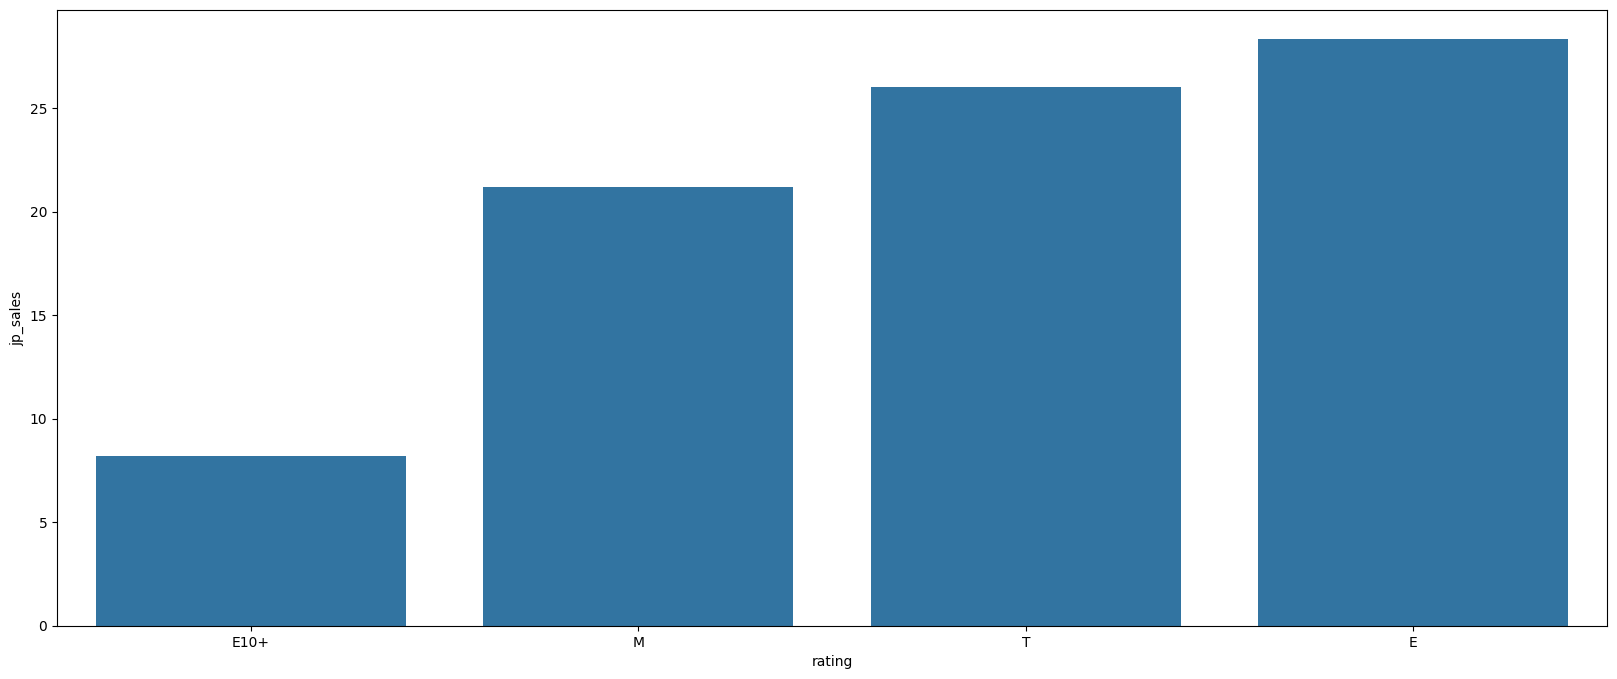

In [104]:
plt.figure(figsize=(20,8))
sns.barplot(data=rating_sales_agg.sort_values(by='jp_sales'), x='rating', y='jp_sales')

**Conclusion**

Based on the analysis of ESRB ratings and their influence on game sales in each region (NA, EU, JP), the following conclusions and insights can be drawn:

1. ESRB Ratings and Sales:
  * ESRB ratings categorize games into different age-appropriate content descriptors, including E (Everyone), E10+ (Everyone 10 and older), T (Teen), and M (Mature).
  * In North America (NA), games with M (Mature) ratings have the highest total sales, followed by E (Everyone) and E10+ (Everyone 10 and older) ratings.
  * Similarly, in Europe (EU), M-rated games lead in total sales, with E-rated games following closely behind. E10+ rated games have relatively lower sales compared to other ratings.
  * In Japan (JP), E-rated games have the highest total sales, followed by T-rated (Teen) games. M-rated games have substantially lower sales in the Japanese market compared to NA and EU.
2. Regional Variances:
  * The North American and European markets demonstrate a preference for games with M (Mature) ratings, indicating a higher demand for content geared towards older audiences in these regions.
  * In contrast, the Japanese market favors games with E (Everyone) ratings, suggesting a preference for family-friendly and inclusive gaming experiences.
  * Teen (T) rated games also perform well in Japan, reflecting a balanced preference for content suitable for a wide range of age groups.
3. Insights from Barplots:
  * The barplots visualize the sales distribution of games across different ESRB ratings in each region, highlighting the influence of rating categories on sales performance.
  * Variations in sales among different ESRB ratings underscore the importance of understanding regional preferences and cultural differences in gaming consumption.
4. Implications for Game Developers and Publishers:
  * Tailoring game content and marketing strategies based on ESRB ratings can enhance sales performance in specific regions.
  * Considering regional variances in ESRB rating preferences is crucial for successful market penetration and revenue optimization.
  * Game developers and publishers should conduct market research to identify target audiences and align their game releases with regional preferences and regulatory requirements.

In summary, analyzing the influence of ESRB ratings on game sales provides valuable insights into consumer behavior and preferences across different regions, informing strategic decision-making for stakeholders in the gaming industry.

# Stage 5: Hypothesis Testing

## Test hypotheses regarding average user ratings for Xbox One vs. PC platforms

The hypothesis that the average user rating of the Xbox One and PC platforms is the same is the Hypothesis of Equality of Means of Two Populations, the Independent Hypothesis, and the Two-Way Hypothesis. So the method used is `st.ttest_ind`

* H0 (Null Hypothesis) = The average rating of Xbox One and PC platform users is the SAME
* H1 (Alternative Hypothesis) = The average user rating of the Xbox One and PC platforms is NOT THE SAME

In [105]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [106]:
new_df['platform'].value_counts()

platform
PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: count, dtype: int64

In [107]:
new_df_2 = new_df[(new_df['user_score'].notnull())].reset_index(drop=True)

In [108]:
new_df_2.isnull().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       234
user_score           0
rating              50
total_sales          0
dtype: int64

In [109]:
df_PC = new_df_2[(new_df_2['platform'] == 'PC')].reset_index(drop=True)
df_XOne = new_df_2[(new_df_2['platform'] == 'XOne')].reset_index(drop=True)

In [110]:
df_PC.shape, df_XOne.shape

((206, 12), (182, 12))

In [111]:
np.var(df_PC['user_score']), np.var(df_XOne['user_score'])

(2.7569952398906588, 1.8965188383045526)

In [113]:
alpha = 0.05 # your code: set critical statistical significance level

p_value_levene = st.levene(df_XOne['user_score'], df_PC['user_score']).pvalue
print(p_value_levene)

if (p_value_levene < alpha):
    print("We reject the null hypothesis: The variance of sample 1 is not the same as sample 2")
else:
    print("We cannot reject the null hypothesis: The variance of sample 1 is not the same as sample 2")

0.01251484281850554
We reject the null hypothesis: The variance of sample 1 is not the same as sample 2


In [114]:
alpha = 0.05 # your code: set critical statistical significance level

results = st.ttest_ind(df_XOne['user_score'], df_PC['user_score'], equal_var=False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

p-value: 0.5489537965134912
We cannot reject the null hypothesis


**Conclusion**

Based on the conducted hypothesis test, we aimed to determine whether the average user rating of the Xbox One and PC platforms is significantly different. Here's a structured conclusion of the analysis:

* Null Hypothesis (H0): The average user rating of Xbox One and PC platform users is the same.
* Alternative Hypothesis (H1): The average user rating of the Xbox One and PC platforms is not the same.

1. Data Preparation:
  * Two datasets were created, one for the PC platform and the other for the Xbox One platform.
  * The user scores for each platform were examined for variance, a preliminary step to assess the assumption of equal variances required for the t-test.
2. Levene's Test for Equality of Variances:
  * Levene's test was conducted to evaluate whether the variance of user scores differs significantly between the Xbox One and PC platforms.
  * The obtained p-value from Levene's test was approximately 0.013, indicating a significant difference in variances between the two platforms.
3. Independent Samples t-Test:
  * Since the assumption of equal variances was violated, an independent samples t-test with unequal variances was performed to compare the average user ratings between the Xbox One and PC platforms.
  * The resulting p-value from the t-test was approximately 0.549.
4. Conclusion:
  * With a significance level of α = 0.05, the p-value (0.549) obtained from the t-test is greater than α.
  * Therefore, we fail to reject the null hypothesis.
  * This suggests that there is insufficient evidence to conclude that the average user rating differs significantly between the Xbox One and PC platforms.
5. Interpretation:
  * Despite the significant difference in variances between the two platforms, the t-test did not detect a significant difference in average user ratings.
  * It implies that while there may be variability in user ratings within each platform, the overall average ratings for Xbox One and PC games are statistically similar.
  * Game developers and publishers may use this information to understand user perceptions and preferences across different gaming platforms, potentially guiding marketing and development strategies.

In summary, the analysis indicates that, despite differences in variance, there is no significant disparity in average user ratings between Xbox One and PC platforms, suggesting a similar user experience perception among gamers for both platforms.

## Test hypotheses regarding average user ratings for Action vs. Sports genres.

Hypothesis The average user rating of different Action and Sports genres is the Hypothesis of Equality of Means of Two Populations, Independent Hypothesis and Two-Way Hypothesis. So the method used is st.ttest_ind

* H0 (Null Hypothesis) = The average user rating for the Action and Sports genres is the SAME
* H1 (Alternative Hypothesis) = The average user rating for the Action and Sports genres is NOT THE SAME

In [115]:
new_df_2['genre'].value_counts()

genre
Action          523
Shooter         195
Sports          195
Role-Playing    171
Racing           86
Adventure        72
Fighting         70
Misc             67
Platform         66
Simulation       42
Strategy         35
Puzzle            9
Name: count, dtype: int64

In [116]:
df_Action = new_df_2[(new_df_2['genre'] == 'Action')].reset_index(drop=True)
df_Sports = new_df_2[(new_df_2['genre'] == 'Sports')].reset_index(drop=True)

In [117]:
df_Action.shape, df_Sports.shape

((523, 12), (195, 12))

In [118]:
np.var(df_Action['user_score']), np.var(df_Sports['user_score'])

(1.8854720340439224, 3.0073882971729127)

In [119]:
alpha = 0.05 # your code: set critical statistical significance level

p_value_levene = st.levene(df_Action['user_score'], df_Sports['user_score']).pvalue
print(p_value_levene)

if (p_value_levene < alpha):
    print("We reject the null hypothesis: The variance of sample 1 is not the same as sample 2")
else:
    print("We cannot reject the null hypothesis: The variance of sample 1 is not the same as sample 2")

1.3125789036876737e-05
We reject the null hypothesis: The variance of sample 1 is not the same as sample 2


In [120]:
alpha = 0.05 # your code: set critical statistical significance level

results = st.ttest_ind(df_Action['user_score'], df_Sports['user_score'], equal_var=False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

p-value: 4.24307776572644e-20
We reject the null hypothesis


**Conclusion**

Based on the conducted hypothesis test, we aimed to determine whether the average user rating for Action and Sports genres significantly differs. Here's a structured conclusion of the analysis:

* Null Hypothesis (H0): The average user rating for Action and Sports genres is the same.
* Alternative Hypothesis (H1): The average user rating for Action and Sports genres is not the same.

1. Data Preparation:
  * Two datasets were created, one for the Action genre and the other for the Sports genre.
  * The user scores for each genre were examined for variance, a preliminary step to assess the assumption of equal variances required for the t-test.
2. Levene's Test for Equality of Variances:
  * Levene's test was conducted to evaluate whether the variance of user scores differs significantly between the Action and Sports genres.
  * The obtained p-value from Levene's test was approximately 1.31e-05, indicating a significant difference in variances between the two genres.
3. Independent Samples t-Test:
  * Since the assumption of equal variances was violated, an independent samples t-test with unequal variances was performed to compare the average user ratings between the Action and Sports genres.
  * The resulting p-value from the t-test was approximately 4.24e-20.
4. Conclusion:
  * With a significance level of α = 0.05, the p-value (4.24e-20) obtained from the t-test is much smaller than α.
  * Therefore, we reject the null hypothesis.
  * This suggests that there is sufficient evidence to conclude that the average user rating significantly differs between the Action and Sports genres.
5. Interpretation:
  * The analysis indicates a significant disparity in average user ratings between the Action and Sports genres.
  * It implies that users perceive and rate games in the Action and Sports genres differently, possibly due to distinct gameplay mechanics, themes, or overall gaming experiences.
  * Game developers and publishers may utilize this information to tailor their game development, marketing, and targeting strategies based on genre-specific user preferences and expectations.

In summary, the hypothesis test reveals that the average user rating significantly varies between the Action and Sports genres, highlighting the importance of genre-specific considerations in game development and marketing efforts.

# Conclusion

In summarizing the key findings and insights derived from the analysis of the 2016 video game sales dataset, we gain a comprehensive understanding of the video game industry's dynamics, market trends, and consumer preferences. Here's a structured narrative encompassing the conclusions drawn from various analyses:

**1. Game Release Trends Analysis:**
  * The exploration of video game releases over the years reveals distinct growth phases in the industry.
  * Initial gradual growth in the 1980s and early 1990s gave way to explosive growth from the mid-1990s to 2008, driven by technological advancements and the emergence of major franchises.
  * Post-2008, the market reached saturation, with a transition towards digital distribution and mobile gaming, impacting the quantity and nature of game releases.

**2. The Titans of the Industry:**
  * Dominant platforms like PlayStation 2, Xbox 360, PlayStation 3, and Nintendo Wii emerged as industry giants, each contributing significantly to overall sales.
  * The ascendance of new platforms like PlayStation 4 and Xbox One signifies the industry's continuous evolution and competition.

**3. The Lifecycle of Platforms:**
  * The lifecycle of gaming platforms highlights the rapid pace of technological innovation and changing consumer preferences.
  * Once-mighty platforms like Sega Dreamcast and Atari 2600 faded into obscurity, illustrating the industry's relentless forward march.

**4. The Lifecycle of Innovation:**
  * New platforms typically experience a cycle of growth, peak, and decline, reflecting the iterative nature of technological advancements and consumer electronics.

**5. Genre Analysis:**
  * Action, Shooter, Role-Playing, and Sports genres emerged as top performers in terms of sales, appealing to a broad audience with immersive gameplay experiences.
  * Puzzle and Strategy genres, while niche, garnered lower sales, reflecting their more specialized appeal.

**6. Regional Sales Analysis:**
  * Regional variations in platform and genre preferences underscore the importance of understanding cultural differences and tailoring marketing strategies accordingly.
  * Platforms like PlayStation and Xbox dominate in North America and Europe, while handheld consoles thrive in Japan.

**7. ESRB Ratings Analysis:**
  * ESRB ratings influence game sales differently across regions, with M-rated games leading in North America and Europe, while E-rated games perform better in Japan.

**8. Hypothesis Testing:**
  * Hypothesis testing revealed significant differences in average user ratings between genres like Action and Sports, highlighting genre-specific user preferences and perceptions.

**Conclusion:**
  * The analysis of the 2016 video game sales dataset offers valuable insights into the multifaceted nature of the gaming industry.
  * It underscores the importance of understanding market trends, consumer preferences, and regional variations for stakeholders in game development, publishing, and marketing.
  * By leveraging these insights, industry professionals can make informed decisions to drive innovation, target audiences effectively, and maximize commercial success in a rapidly evolving and competitive landscape.

In summary, the analysis provides a holistic view of the video game industry's intricacies, offering actionable insights to navigate challenges and capitalize on opportunities in this dynamic and vibrant market.